
    
## <center> Plateforme de recommandation de poste


###  <center> Partie I: Analyse Exploratoire des Données

**Enoncé** :
L'objectif est de concevoir un système de recommandation d'emploi pour une plateforme dédiée. Ce système doit recommander des postes à des candidats en fonction de leurs caractéristiques ainsi que des critères des offres d'emploi.

**Description de la situation** : La plateforme diffuse des offres d'emploi associées à des emplacements et à des domaines spécifiques. Elle dispose également d'une liste exhaustive de candidats comprenant leurs diplômes, leur localisation, leur domaine d'études et leur expérience professionnelle. De plus, la plateforme collecte des données sur le comportement des utilisateurs, telles que les actions effectuées sur les offres d'emploi (consultation, candidature) ainsi que leur statut d'embauche.

**Tâche technique (bonus)**
* Utiliser des techniques de traitement du langage naturel (NLP) pour traiter les titres, descriptions et prérequis des offres d'emploi ainsi que certaines informations sur les domaines d'application des candidat, et les trier par score de similarité.

**Type de tâche de Machine Learning**
* Système de recommandation basé sur le score de similarité:
* Réduction de dimension par SVD/TSNE (pour la visualisation) et Clustering avec K-means + Système de recommandation basé sur le score de similarité

**Métriques :**
* Système de recommandation : similarité linéaire
* Clustering : coefficient de silhouette pour obtenir le nombre optimal de clusters

**Données :** Le jeu de données possède plusieurs datasets:
- utilisateurs (plus de 2000) 
- historique des utilisateurs
- métiers (plus de 4000)
- retour (plus de 28 000)

***

# <p style="text-align:center;font-size:100%;">0. Install and Import</p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Charger les datasets
DATA_DIR = "/kaggle/input/technical-test/" #"data/"

data_users = pd.read_csv(DATA_DIR+"users.csv") # données utilisateurs
data_users_history = pd.read_csv(DATA_DIR +"users_history.csv") # historique des utilisateurs
data_test_users = pd.read_csv(DATA_DIR+"test_users.csv") # données utilisateur test
data_jobs = pd.read_csv(DATA_DIR+"jobs.csv") # données jobs
data_feedbacks = pd.read_csv(DATA_DIR+"feedbacks.csv") # données feedbacks

# Copie des données
df_users = data_users.copy()
df_users_history = data_users_history.copy()
df_test_users = data_test_users.copy()
df_jobs = data_jobs.copy()
df_feedbacks = data_feedbacks.copy()

#### Analysons le contenu des DataSets

In [3]:
# Observation de quelques lignes du dataset users et de la forme
display(df_users.head())
print(f"\nNombre de lignes et de colonnes dans le dataset: {df_users.shape}")

UserID            City State Country ZipCode   DegreeType  \
0      23  Mount Prospect    IL      US   60056  High School   
1     698          Normal    IL      US   61761          NaN   
2    2305     Lake Forest    IL      US   60045          NaN   
3    2785         Chicago    IL      US   60607   Bachelor's   
4    3406          Joliet    IL      US   60435   Bachelor's   

                   Major       GraduationDate  WorkHistoryCount  \
0         Not Applicable  2002-01-01 00:00:00                 3   
1                    NaN                  NaN                 4   
2              insurance  2010-12-01 00:00:00                 4   
3  International Affairs  2005-01-01 00:00:00                 6   
4                English                  NaN                 3   

   TotalYearsExperience CurrentlyEmployed ManagedOthers  ManagedHowMany  \
0                  10.0               Yes            No               0   
1                   7.0               Yes            No               0   
2                   9.0               Yes            No               0   
3                  10.0               Yes            No               0   
4                  20.0                No           Yes             350   

   MajorCategoryID  
0              0.0  
1              NaN  
2            180.0  
3            191.0  
4             40.0


Nombre de lignes et de colonnes dans le dataset: (2337, 14)


In [4]:
# Observation de quelques lignes du dataset users history et de la forme
display(df_users_history.head())
print(f"\nNombre de lignes et de colonnes dans le dataset: {df_users_history.shape}")

UserID  Sequence                                          JobTitle  \
0      23         1                                           Manager   
1      23         2                               Assisting customers   
2     698         1                                  Advocate Bromenn   
3     698         2  Customer Service, Patient contact, drawing blood   
4     698         3              Customer Service, Suggestive selling   

   JobCategoryID  
0            0.0  
1           30.0  
2           88.0  
3          135.0  
4            1.0


Nombre de lignes et de colonnes dans le dataset: (11012, 4)


In [5]:
# Observation de quelques lignes du dataset test users et de la forme
display(df_test_users.head())
print(f"\nNombre de lignes et de colonnes dans le dataset: {df_test_users.shape}")

UserID             City State Country  ZipCode  DegreeType          Major  \
0   12924          Chicago    IL      US    60628  Bachelor's            NaN   
1   18947          Chicago    IL      US    60647         NaN            NaN   
2   20976  Rolling Meadows    IL      US    60008    Master's            NaN   
3   21412          Chicago    IL      US    60649         NaN  Basic Studies   
4   40564             Zion    IL      US    60099         NaN            NaN   

        GraduationDate  WorkHistoryCount  TotalYearsExperience  \
0  2005-05-01 00:00:00                 4                   9.0   
1                  NaN                 6                  22.0   
2                  NaN                 5                   6.0   
3  2007-01-01 00:00:00                 5                   5.0   
4                  NaN                 6                   5.0   

  CurrentlyEmployed ManagedOthers  ManagedHowMany  MajorCategoryID  
0               Yes            No               0              NaN  
1               Yes            No               0              NaN  
2                No           Yes               6              NaN  
3               Yes            No               0              NaN  
4               NaN            No               0              NaN


Nombre de lignes et de colonnes dans le dataset: (277, 14)


In [6]:
# Observation de quelques lignes du dataset jobs et de la forme
display(df_jobs.head())
print(f"\nNombre de lignes et de colonnes dans le dataset: {df_jobs.shape}")

JobID                           Title  \
0     75        Administrative Assistant   
1    505                        LAB TECH   
2    764           Travel-Seasonal Staff   
3    766  MARKETING/ Social Media intern   
4    781                  Printing Sales   

                                         Description  \
0  The Administrative Assistant must be reliable ...   
1  S. Florida Medical Device Co. seeks QC Lab Tec...   
2  <p>Travel-Seasonal Staff </p> <p> CB331736 Ros...   
3  <p>Marketing Rep </p> <p> CB326227 Chicago </p...   
4  <p>Printing Sales Experienced, outside sales w...   

                                        Requirements           City State  \
0  Please refer to the Job Description to view th...        Houston    TX   
1  General knowledge of scientific or clinical la...     Plantation    FL   
2  Please refer to the Job Description to view th...    Des Plaines    IL   
3  Please refer to the Job Description to view th...        Chicago    IL   
4  Please refer to the Job Description to view th...  Schiller Park    IL   

  Country     Zip5                StartDate              EndDate  \
0      US  77036.0  2012-03-30 01:23:57.737  2012-04-29 23:59:59   
1      US  33313.0  2012-03-23 04:48:17.063  2012-04-22 23:59:59   
2      US  60018.0  2012-03-18 05:19:04.863  2012-04-17 23:59:59   
3      US  60606.0   2012-03-22 10:33:46.89  2012-04-21 23:59:59   
4      US  60176.0  2012-04-01 01:16:40.797  2012-04-30 23:59:59   

   JobCategoryID  
0             20  
1            137  
2             59  
3            141  
4              4


Nombre de lignes et de colonnes dans le dataset: (4291, 11)


In [7]:
# Observation de quelques lignes du dataset feedbacks et de la forme
display(df_feedbacks.head())
print(f"\nNombre de lignes et de colonnes dans le dataset: {df_feedbacks.shape}")

UserID    JobID   Event
0     698  1053272  viewed
1     698   535105  viewed
2     698   171400  viewed
3     698   804823  viewed
4     698  1113149  viewed


Nombre de lignes et de colonnes dans le dataset: (28928, 3)


On a donc 5 datasets:
- users: avec des informations sur les utilisateurs
- test_users qui est la version à tester des utilisateurs
- users_history: avec des informations sur l'historique professionnel des utilisateurs
- jobs: avec la description des métiers
- feedbacks: avec la description les utilisateurs qui ont matché avec des jobs sur la plateforme

***

# <p style="text-align:center;font-size:100%;">1. Analyse des datasets: missing values, duplicates, outliers</p>

## <center> USERS DATASET

### `Total information`

Lisons le jeu de données dans le DataFrame *users* et jetons un coup d'œil à sa *forme, ses colonnes, les types de données des colonnes et les cinq premières lignes des données*.

Cela nous donnera un aperçu succinct des données en notre possession.

In [8]:
# Lecture du fichier csv
print(f"Forme des données: {df_users.shape}\n")

display(df_users.head(5))
display(df_users.info())

Forme des données: (2337, 14)



UserID            City State Country ZipCode   DegreeType  \
0      23  Mount Prospect    IL      US   60056  High School   
1     698          Normal    IL      US   61761          NaN   
2    2305     Lake Forest    IL      US   60045          NaN   
3    2785         Chicago    IL      US   60607   Bachelor's   
4    3406          Joliet    IL      US   60435   Bachelor's   

                   Major       GraduationDate  WorkHistoryCount  \
0         Not Applicable  2002-01-01 00:00:00                 3   
1                    NaN                  NaN                 4   
2              insurance  2010-12-01 00:00:00                 4   
3  International Affairs  2005-01-01 00:00:00                 6   
4                English                  NaN                 3   

   TotalYearsExperience CurrentlyEmployed ManagedOthers  ManagedHowMany  \
0                  10.0               Yes            No               0   
1                   7.0               Yes            No               0   
2                   9.0               Yes            No               0   
3                  10.0               Yes            No               0   
4                  20.0                No           Yes             350   

   MajorCategoryID  
0              0.0  
1              NaN  
2            180.0  
3            191.0  
4             40.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                2337 non-null   int64  
 1   City                  2337 non-null   object 
 2   State                 2337 non-null   object 
 3   Country               2337 non-null   object 
 4   ZipCode               2335 non-null   object 
 5   DegreeType            1715 non-null   object 
 6   Major                 1748 non-null   object 
 7   GraduationDate        1632 non-null   object 
 8   WorkHistoryCount      2337 non-null   int64  
 9   TotalYearsExperience  2260 non-null   float64
 10  CurrentlyEmployed     2015 non-null   object 
 11  ManagedOthers         2337 non-null   object 
 12  ManagedHowMany        2337 non-null   int64  
 13  MajorCategoryID       1749 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 255.7+ KB


None

### **Exploration du contenu des variables**

Le jeu de données est dédié aux utilisateurs enregistrés sur la plateforme et contient 2337 lignes et 14 colonnes.

Divisons toutes les caractéristique en 3 groupes :
- Emplacement
- Description du diplôme
- Caractéristiques professionnelles

*Emplacement de l'utilisateur
- Country: nom complet du pays
- State: nom complet de l'état
- City: nom complet de la ville
- ZipCode : code postal de l'emplacement

*Description du diplôme
- DegreeType: type du diplôme
- Major: domaine d'études
- MajorCategoryId: identifiant de la catégorie majeure
- GraduationDate: date d'obtention du diplôme

*Caractéristiques professionnelles
- WorkHistoryCount : nombre d'expériences professionnelles
- TotalYearsExperience : nombre total d'années d'expérience
- CurrentlyEmployed : actuellement employé (oui/non)
- ManagedOthers : a-t-il géré d'autres personnes (oui/non)
- ManageHowMany : combien de personnes il a gérées

Quelques observations sur les données :
* Toutes les lignes sont uniques
     
Premier avis: Je pense que les groupes les plus intéressants pour notre tâche de recommandation sont *Description du diplôme* et *Caractéristiques professionnelles*. Sachant que tous les utilisateurs se trouvent dans Illinois aux Etats-Unis.

In [9]:
"""
Define Unique categories in each column
"""
unique_list = []

for col in df_users.columns:
    # creating tuple: column name, number of unique values, type
    item = (col, df_users[col].nunique(), df_users[col].dtypes, df_users[col].unique())
    unique_list.append(item)
    
unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column_Name", "Num_Unique", "Type", "Unique_category"]
).sort_values(by="Num_Unique")


display(unique_counts)

Column_Name  Num_Unique     Type  \
2                  State           1   object   
3                Country           1   object   
10     CurrentlyEmployed           2   object   
11         ManagedOthers           2   object   
5             DegreeType           6   object   
8       WorkHistoryCount          14    int64   
9   TotalYearsExperience          47  float64   
12        ManagedHowMany          66    int64   
13       MajorCategoryID          97  float64   
7         GraduationDate         291   object   
1                   City         350   object   
4                ZipCode         449   object   
6                  Major         739   object   
0                 UserID        2337    int64   

                                      Unique_category  
2                                                [IL]  
3                                                [US]  
10                                     [Yes, No, nan]  
11                                          [No, Yes]  
5   [High School, nan, Bachelor's, Associate's, Ma...  
8      [3, 4, 6, 5, 2, 0, 10, 7, 1, 8, 9, 12, 13, 11]  
9   [10.0, 7.0, 9.0, 20.0, 4.0, 5.0, 15.0, nan, 21...  
12  [0, 350, 10, 20, 100, 4, 5, 180, 2, 15, 12, 1,...  
13  [0.0, nan, 180.0, 191.0, 40.0, 20.0, 128.0, 11...  
7   [2002-01-01 00:00:00, nan, 2010-12-01 00:00:00...  
1   [Mount Prospect, Normal, Lake Forest, Chicago,...  
4   [60056, 61761, 60045, 60607, 60435, 60459, 604...  
6   [Not Applicable, nan, insurance, International...  
0   [23, 698, 2305, 2785, 3406, 4182, 4768, 5080, ...

Remarquons que les UserID sont tous uniques dans le dataset.



***

### Caractéristiques de l'éducation

- DegreeType: type du diplôme
- Major: domaine d'études
- MajorCategoryId: identifiant de la catégorie majeure
- GraduationDate: date d'obtention du diplôme


***

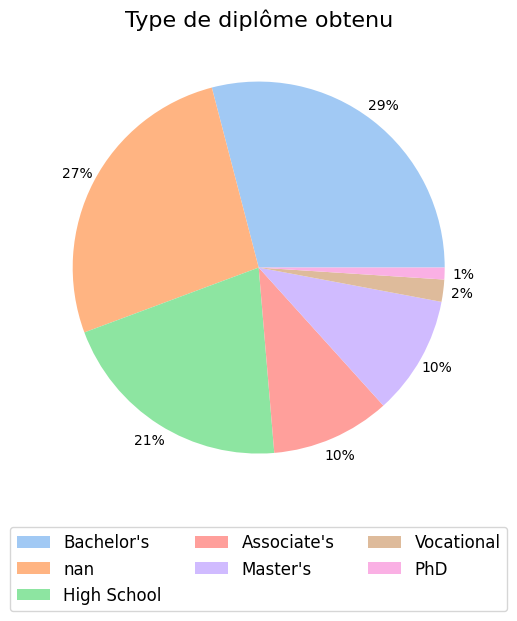

In [10]:
"""
Vérifions en détail les catégories uniques dans la colonne "DegreeType" de l'éducation.
"""
deg_type = df_users["DegreeType"].value_counts(dropna=False).reset_index()
deg_type.columns = ["DegreeType", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(deg_type["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Type de diplôme obtenu", fontsize=16)
plt.legend(deg_type["DegreeType"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()


Quelques observations:
* Une grande partie des utilisateurs possèdent un Bachelor (30%)
* Environ 27% des données concernant le type de diplôme sont manquantes.

Nous pourrons peut être les remplacer par le diplôme le moins élevé (HighSchool)?

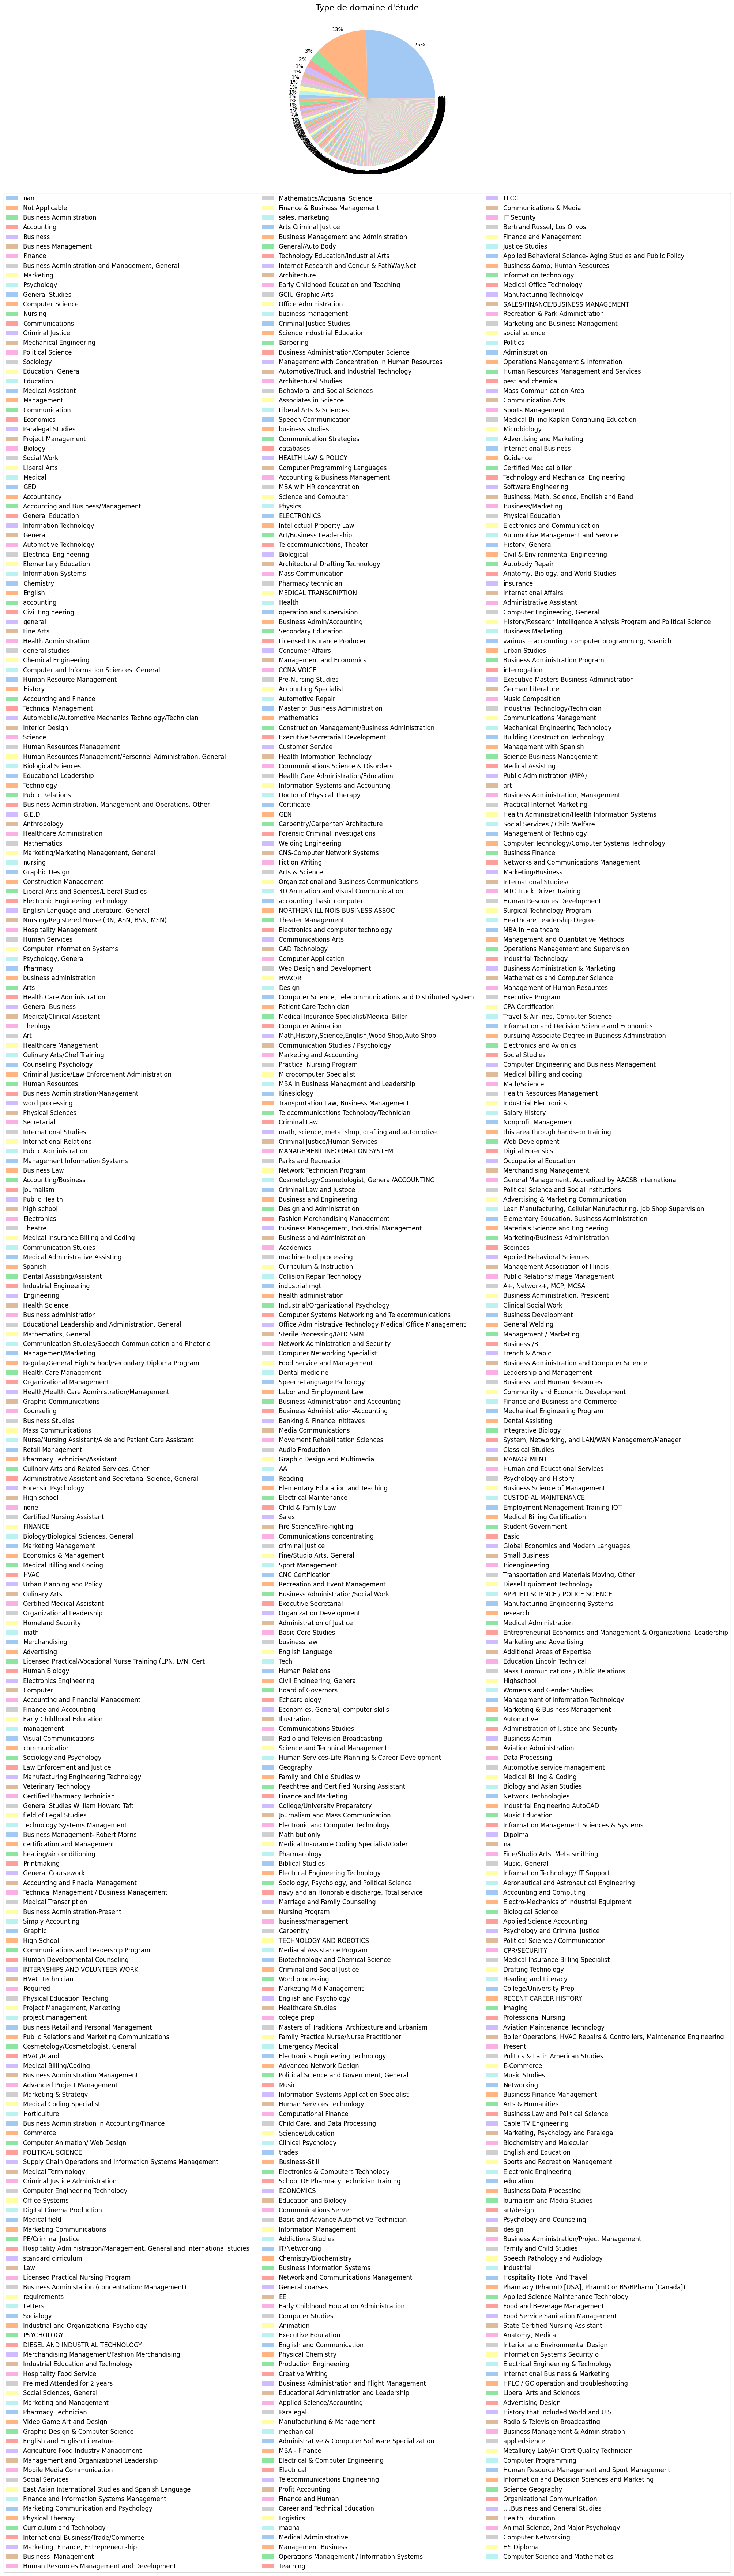

In [11]:
"""
Vérifions en détail les catégories uniques dans la colonne "Major" de l'éducation.
"""
major_type = df_users["Major"].value_counts(dropna=False).reset_index()
major_type.columns = ["Major", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(major_type["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Type de domaine d'étude", fontsize=16)
plt.legend(major_type["Major"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

C'est pas très clair. Utilisons un autre graphe.

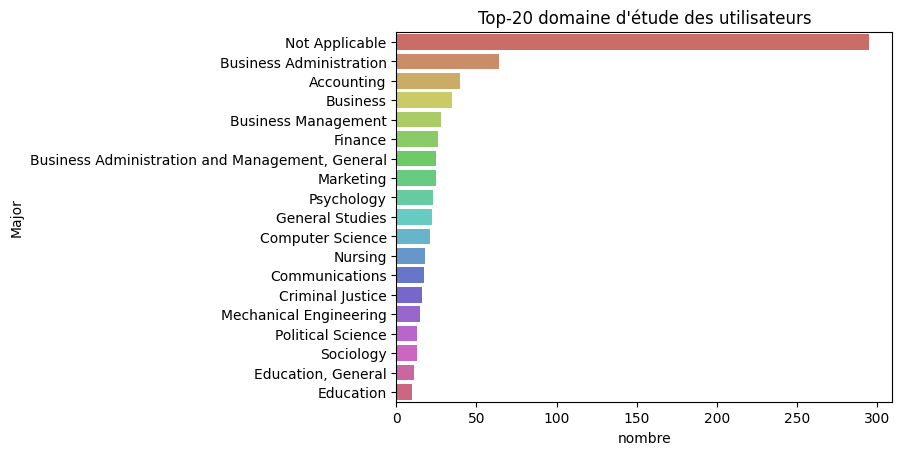

In [12]:
# Diagramme enbarre
sns.barplot(x="nombre", y="Major", data=major_type[:20], color="blue", palette="hls").set(title="Top-20 domaine d'étude des utilisateurs");

Quelques observations:
* La catégorie major contient 25% de variables manquantes
* 12% d'éléments ayant le nom de 'Not Applicable' (A quoi cela correspond ?)
* 2.7% des domaines d'étude correspondent à 'Business Administration'

Top-5 des domaines d'étude des utilisateurs:
* Business Administration
* Accounting
* Business
* Business Management
* Finance

Déjà on remarque que les domaines d'études sont très précis (Business Administration, Business, Business Management). Ne faudrait il pas regrouper ces jobs selon des domaines d'étude plus généraux (seulement business par exemple) ?

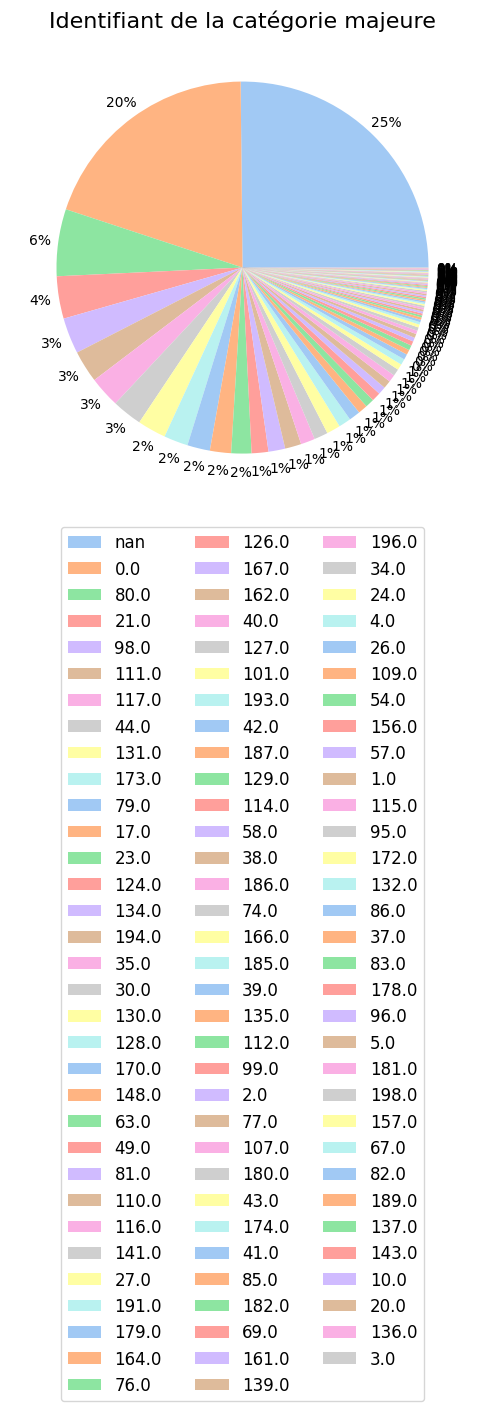

In [13]:
"""
Vérifions en détail les catégories uniques dans la colonne "MajorCategoryID" de l'éducation.
"""
majorID_type = df_users["MajorCategoryID"].value_counts(dropna=False).reset_index()
majorID_type.columns = ["MajorCategoryID", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(majorID_type["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Identifiant de la catégorie majeure", fontsize=16)
plt.legend(majorID_type["MajorCategoryID"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

Quelques observations:
* Il y a 97 catégories
* Il y a largement moins de classe dans cette caractéristique que dans la précédente (il vaudrait peut être mieux utiliser celle la pour la recommendation de job)
* 20% d'éléments ayant la valeur 0 (peut être cela est associé au 'Not applicable')
* La catégorie majorID contient 25% de variables manquantes (cela correspond t-il au 25% des variables manquantes de la catégorie Major ?)
* Environ 6% ont la valeur 80 et le reste est partagé entre les 95 autres éléments uniques. 

Il y a 1632 dates correctes


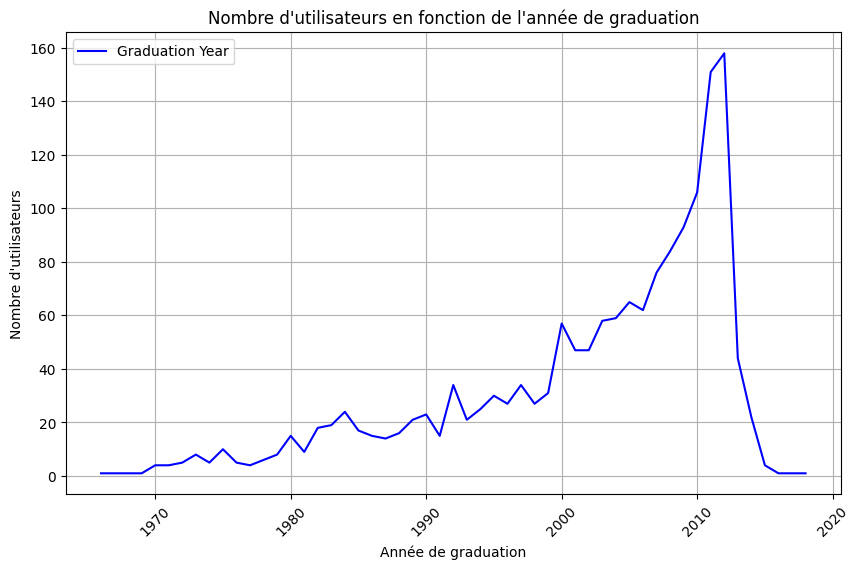

In [14]:
"""
Vérifions en détail les dates uniques dans la colonne "GraduationDate" de l'utilisateur.
"""


# Convertir les colonnes de dates en objets de date/heure avec gestion des erreurs
df_users["GraduationDate"] = pd.to_datetime(df_users["GraduationDate"], errors='coerce')

# Extraire l'année de la colonne "GraduationDate"
df_users["GraduationYear"] = df_users["GraduationDate"].dt.year

# Supprimer les lignes avec des dates invalides (NaT)
df_users.dropna(subset=["GraduationYear"], inplace=True)
print(f'Il y a {df_users.shape[0]} dates correctes')

# Compter le nombre d'utilisateurs pour chaque année de graduation
users_count_by_grad_year = df_users.groupby("GraduationYear").size()

# Tracer le nombre d'utilisateurs en fonction de l'année de graduation
plt.figure(figsize=(10, 6))
plt.plot(users_count_by_grad_year.index, users_count_by_grad_year.values, linestyle='-', color='blue', label='Graduation Year')

plt.title("Nombre d'utilisateurs en fonction de l'année de graduation")
plt.xlabel("Année de graduation")
plt.ylabel("Nombre d'utilisateurs")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Quelques observations:
- Il y a un pic d'utilisateur dans les années 2010
- La courbe s'écroule een 2015 pour atteindre presque 0 utilisateur

Je ne sais pas que faire de cette information (peut être qu'elle ne nous sera pas utile pour la suite). Peut être que ceux après 2015 ne connaissent pas la plateforme ?

***

### Caractéristiques professionnelles
- WorkHistoryCount : nombre d'expériences professionnelles
- TotalYearsExperience : nombre total d'années d'expérience
- CurrentlyEmployed : actuellement employé (oui/non)
- ManagedOthers : a-t-il géré d'autres personnes (oui/non)
- ManageHowMany : combien de personnes il a gérées

***

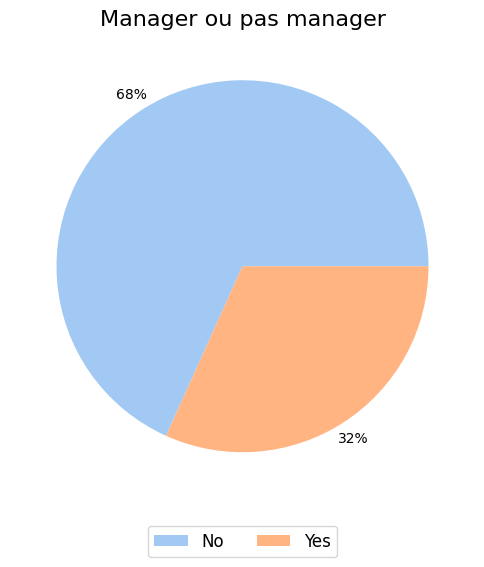

In [15]:
"""
Vérifions en détail les catégories uniques dans la colonne "ManagedOthers" de l'éducation.
"""
managed_cat = df_users["ManagedOthers"].value_counts(dropna=False).reset_index()
managed_cat.columns = ["ManagedOthers", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(managed_cat["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Manager ou pas manager", fontsize=16)
plt.legend(managed_cat["ManagedOthers"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

Quelques observations:
* 71% des utilisateurs n'ont pas managé contre 29%
* Aucune variable manquante

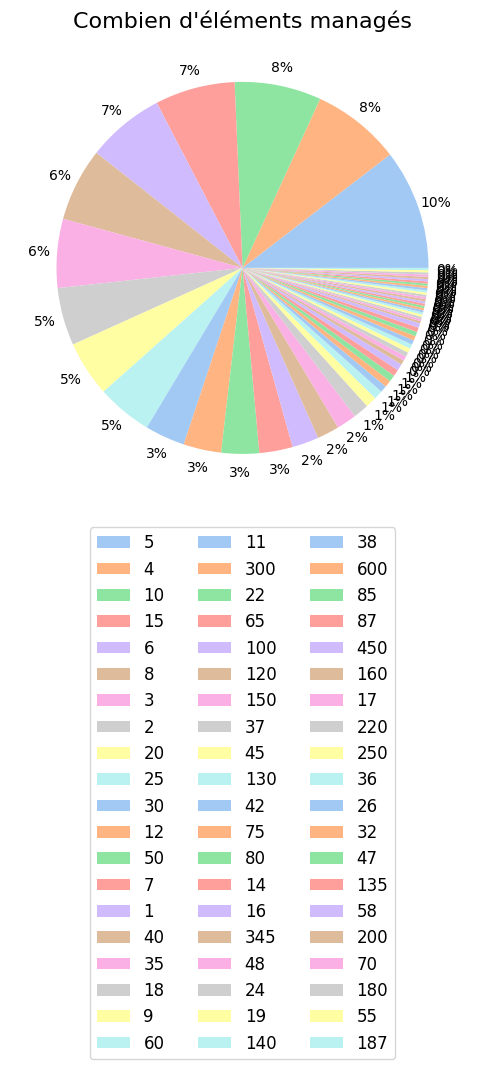

In [16]:
"""
Vérifions en détail les catégories uniques dans la colonne "ManagedHowMany" de l'éducation.
"""
# Définition du dataset des utilisateurs ayant managé
df_managed = df_users[df_users['ManagedHowMany'] != 0]['ManagedHowMany']

managed_num = df_managed.value_counts(dropna=False).reset_index()
managed_num.columns = ["ManagedHowMany", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(managed_num["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Combien d'éléments managés", fontsize=16)
plt.legend(managed_num["ManagedHowMany"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

Il y a 60 catégories différentes pour la variable 'ManagedHowMany'
ManagedHowMany
5      10.424710
4       7.722008
10      7.528958
15      6.949807
6       6.756757
8       6.370656
3       5.984556
2       5.019305
20      4.826255
25      4.826255
30      3.474903
12      3.281853
50      3.281853
7       2.895753
1       2.316602
40      1.930502
35      1.737452
18      1.351351
9       0.965251
60      0.772201
11      0.579151
300     0.579151
22      0.579151
65      0.579151
100     0.579151
16      0.386100
14      0.386100
80      0.386100
75      0.386100
42      0.386100
130     0.386100
37      0.386100
150     0.386100
120     0.386100
45      0.386100
135     0.193050
36      0.193050
26      0.193050
32      0.193050
47      0.193050
200     0.193050
58      0.193050
220     0.193050
70      0.193050
180     0.193050
55      0.193050
250     0.193050
160     0.193050
17      0.193050
450     0.193050
87      0.193050
85      0.193050
600     0.193050
38      0.193050


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


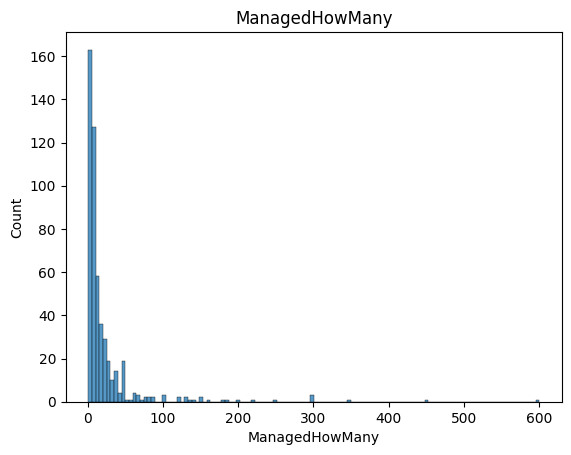

count    518.000000
mean      23.864865
std       50.360145
min        1.000000
25%        5.000000
50%       10.000000
75%       24.750000
max      600.000000
Name: ManagedHowMany, dtype: float64

In [17]:
# Compte le nombre d'élément unique sans 0
print(f"Il y a {len(df_managed.unique())} catégories différentes pour la variable 'ManagedHowMany'")

# Calculer le nombre total d'entrées dans la colonne "ManagedHowMany"
total_entries = df_managed.shape[0]

# Calculer le nombre d'occurrences de chaque valeur unique dans la colonne "ManagedHowMany"
exp_counts = df_managed.value_counts(dropna=False)

# Calculer les pourcentages
exp_percentages = (exp_counts / total_entries) * 100

# Trier les résultats par ordre décroissant de pourcentage
exp_percentages_sorted = exp_percentages.sort_values(ascending=False)

# Afficher les pourcentages
print(exp_percentages_sorted)

# Affiche l'histogramme du nombre de personnes managé
plt.figure()
sns.histplot(df_managed)
plt.title('ManagedHowMany')
plt.show()

# Affiche les statistiques
df_managed.describe()

Quelques observations:
* 10 et 5 personnes ont été managé par 9% des utilisateurs (respectivement)
* En moyenne les utilisateurs qui ont managé manage 25 personnes et la personne qui a managé le plus de personnes en a géré 600. 
* On remarque sur l'histogramme que la propotion d'utilisateur ayant managé plus de 100 personnes est faible.

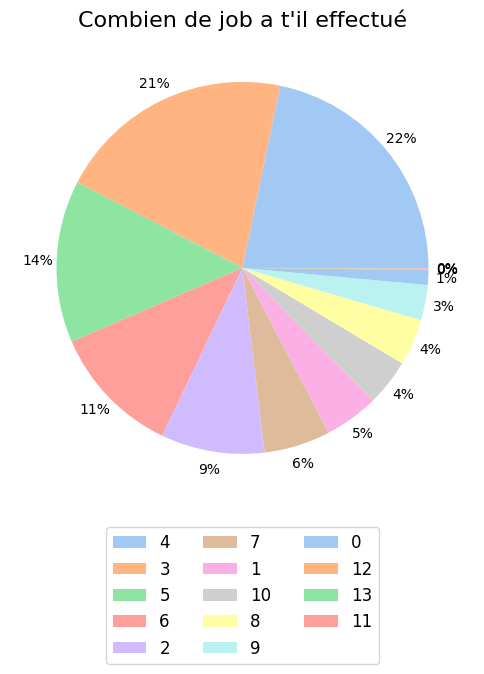

In [18]:
"""
Vérifions en détail les catégories uniques dans la colonne "WorkHistoryCount" des caractéristiques pro.
"""

job_num = df_users['WorkHistoryCount'].value_counts(dropna=False).reset_index()
job_num.columns = ["WorkHistoryCount", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(job_num["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Combien de job a t'il effectué", fontsize=16)
plt.legend(job_num["WorkHistoryCount"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

Il y a 14 catégories différentes pour la variable 'WorkHistoryCount'
WorkHistoryCount
4     21.752451
3     20.649510
5     14.093137
6     11.397059
2      9.007353
7      5.759804
1      4.718137
10     4.044118
8      4.044118
9      3.063725
0      1.286765
12     0.061275
13     0.061275
11     0.061275
Name: count, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


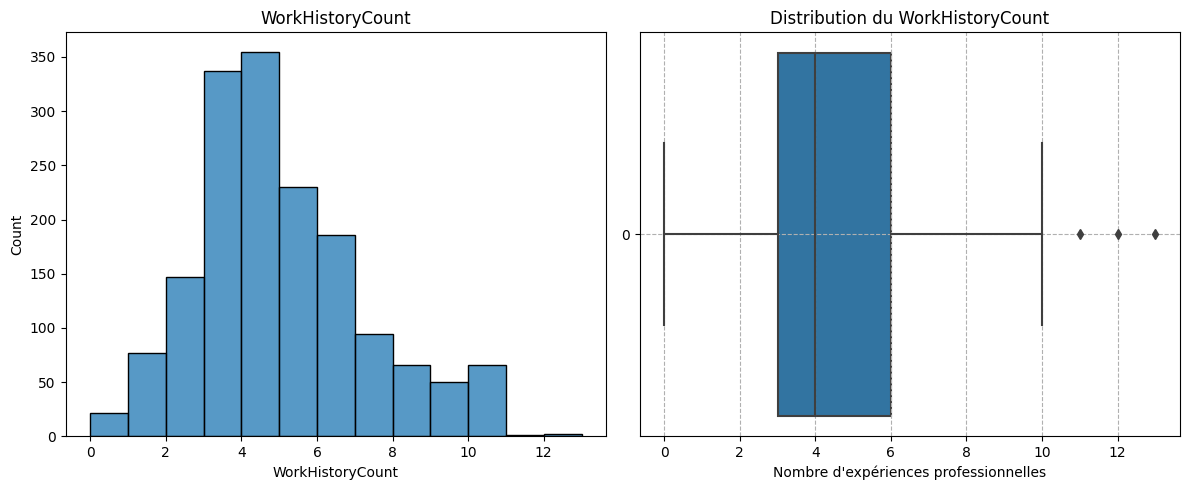

In [19]:
# Compte le nombre d'élément unique
print(f"Il y a {len(df_users['WorkHistoryCount'].unique())} catégories différentes pour la variable 'WorkHistoryCount'")

# Calculer le nombre total d'entrées dans la colonne "DegreeType"
total_entries = df_users['WorkHistoryCount'].shape[0]

# Calculer le nombre d'occurrences de chaque valeur unique dans la colonne "DegreeType"
exp_counts = df_users['WorkHistoryCount'].value_counts(dropna=False)

# Calculer les pourcentages
exp_percentages = (exp_counts / total_entries) * 100

# Trier les résultats par ordre décroissant de pourcentage
exp_percentages_sorted = exp_percentages.sort_values(ascending=False)

# Afficher les pourcentages
print(exp_percentages_sorted)

# Affiche l'histogramme et la boxplot côte à côte
plt.figure(figsize=(12, 5))

# Histogramme
plt.subplot(1, 2, 1)
sns.histplot(df_users['WorkHistoryCount'], bins=df_users['WorkHistoryCount'].max())
plt.title('WorkHistoryCount')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(
    df_users['WorkHistoryCount'],
    orient="h",
    width=0.9,
);
plt.grid(ls='--')
plt.title('Distribution du WorkHistoryCount')
plt.xlabel('Nombre d\'expériences professionnelles')

plt.tight_layout()
plt.show()


In [20]:
# Affiche les stats
df_users['WorkHistoryCount'].describe()

count    1632.000000
mean        4.534314
std         2.240051
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        13.000000
Name: WorkHistoryCount, dtype: float64

Quelques observations:
* Plus de 3/4 des utilisateurs ont eu entre 2 et 6 expériences professionnelles
* En moyenne les utilisateurs 4.5 experiences professionnelles
* On observe peu d'outliers

Il y a 45 catégories différentes pour la variable 'TotalYearsExperience'
TotalYearsExperience
7.0      6.985294
5.0      6.985294
6.0      6.740196
8.0      6.250000
12.0     5.943627
9.0      5.698529
4.0      5.392157
13.0     5.269608
11.0     5.147059
10.0     5.147059
14.0     4.473039
15.0     3.615196
16.0     2.757353
3.0      2.450980
17.0     2.267157
18.0     2.205882
21.0     1.899510
2.0      1.899510
19.0     1.899510
1.0      1.838235
20.0     1.715686
22.0     1.593137
23.0     1.470588
NaN      1.286765
24.0     1.102941
27.0     1.041667
26.0     0.919118
25.0     0.857843
0.0      0.551471
29.0     0.551471
28.0     0.551471
30.0     0.490196
32.0     0.490196
38.0     0.428922
36.0     0.367647
33.0     0.306373
34.0     0.306373
31.0     0.245098
39.0     0.245098
37.0     0.183824
35.0     0.183824
46.0     0.061275
41.0     0.061275
40.0     0.061275
111.0    0.061275
Name: count, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


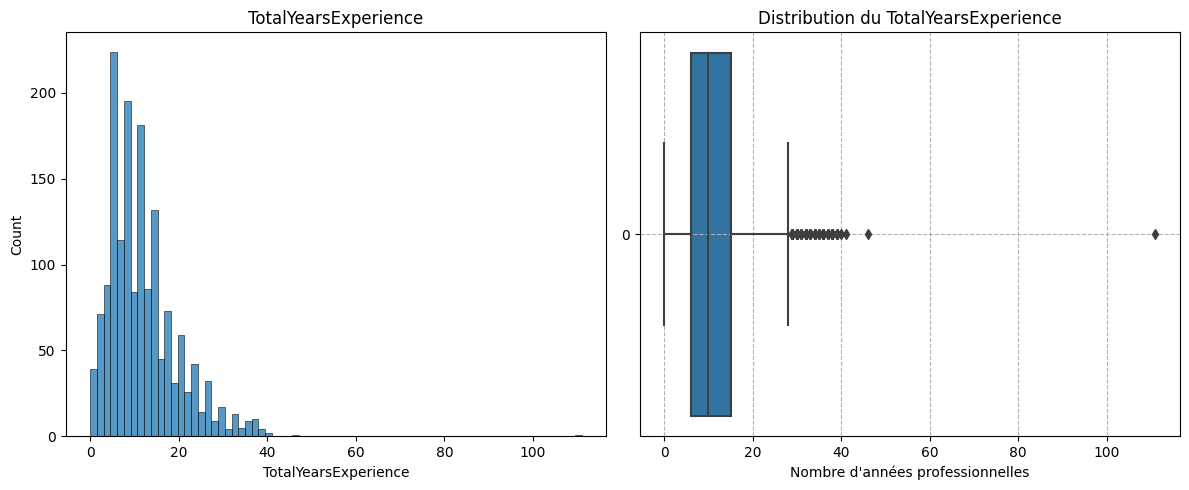

In [21]:
"""
Vérifions en détail les catégories uniques dans la colonne "TotalYearsExperience" des caractéristiques pro.
"""

# Compte le nombre d'élément unique
print(f"Il y a {len(df_users['TotalYearsExperience'].unique())} catégories différentes pour la variable 'TotalYearsExperience'")

# Calculer le nombre total d'entrées dans la colonne "DegreeType"
total_entries = df_users['TotalYearsExperience'].shape[0]

# Calculer le nombre d'occurrences de chaque valeur unique dans la colonne "DegreeType"
exp_counts = df_users['TotalYearsExperience'].value_counts(dropna=False)

# Calculer les pourcentages
exp_percentages = (exp_counts / total_entries) * 100

# Trier les résultats par ordre décroissant de pourcentage
exp_percentages_sorted = exp_percentages.sort_values(ascending=False)

# Afficher les pourcentages
print(exp_percentages_sorted)

# Affiche l'histogramme et la boxplot côte à côte
plt.figure(figsize=(12, 5))

# Histogramme
plt.subplot(1, 2, 1)
sns.histplot(df_users['TotalYearsExperience'])
plt.title('TotalYearsExperience')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(
    df_users['TotalYearsExperience'],
    orient="h",
    width=0.9,
);
plt.grid(ls='--')
plt.title('Distribution du TotalYearsExperience')
plt.xlabel('Nombre d\'années professionnelles')

plt.tight_layout()
plt.show()

In [22]:
# Affiche les stats
df_users['TotalYearsExperience'].describe()

count    1611.000000
mean       11.986344
std         7.998280
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max       111.000000
Name: TotalYearsExperience, dtype: float64

Quelques observations:
* On observe des coquilles dans le dataset, deux personnes ont plus de 100 ans d'expériences (on les retire).
* En moyenne les utilisateurs ont 13ans d'experiences professionnelles
* On observe de nombreux outliers

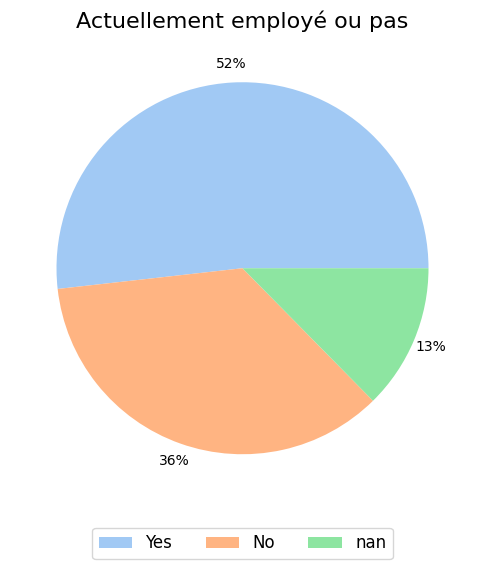

In [23]:
"""
Vérifions en détail les catégories uniques dans la colonne "CurrentlyEmployed" des caractéristiques pro.
"""
curr_emp = df_users["CurrentlyEmployed"].value_counts(dropna=False).reset_index()
curr_emp.columns = ["CurrentlyEmployed", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(curr_emp["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Actuellement employé ou pas", fontsize=16)
plt.legend(curr_emp["CurrentlyEmployed"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

Quelques observations:
* 50% des utilisateurs sur la plateforme ont du travail
* 14% des données sont manquantes

***

** Caractéristique d'emplacement**:

***

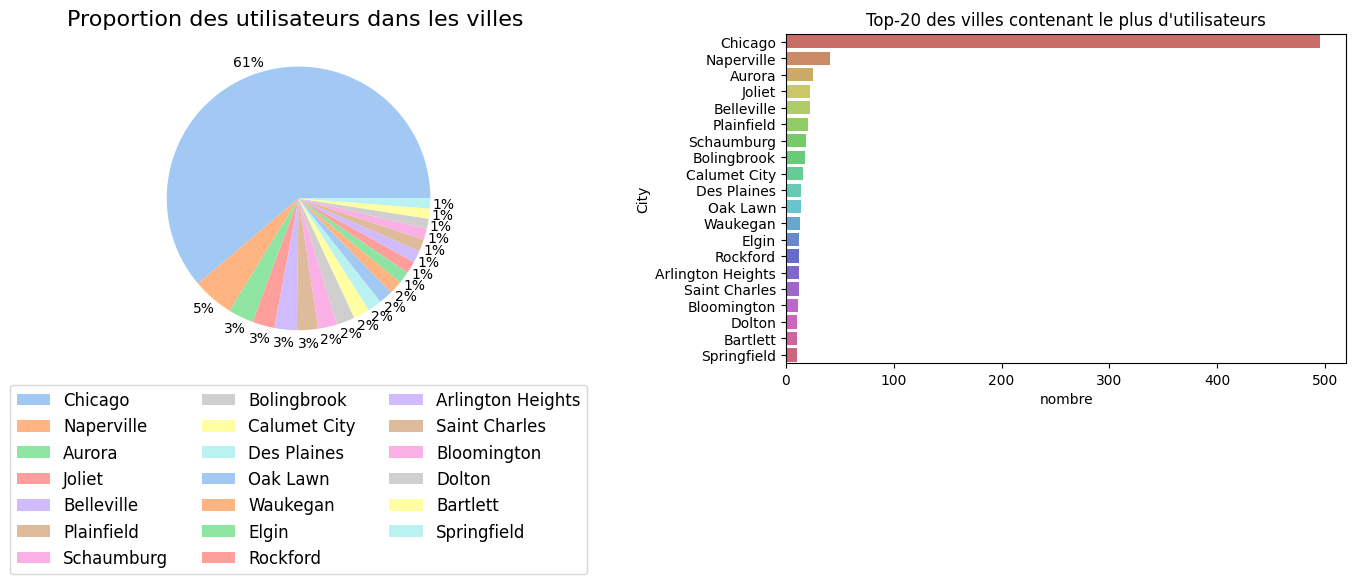

In [24]:
"""
Vérifions en détail les catégories uniques dans la colonne "City" des caractéristiques d'emplacement.
"""
city_num_user = df_users["City"].value_counts(dropna=False).reset_index()[:20]
city_num_user.columns = ["City", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")


# Créer un sous-tracé pour le diagramme circulaire et le diagramme en barres
plt.figure(figsize=(14, 6))

# Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(city_num_user["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Proportion des utilisateurs dans les villes ", fontsize=16)
plt.legend(city_num_user["City"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)


# Diagramme en barres
plt.subplot(1, 2, 2)
sns.barplot(x="nombre", y="City", data=city_num_user, color="blue", palette="hls").set(title="Top-20 des villes contenant le plus d'utilisateurs");
plt.tight_layout()
plt.show()

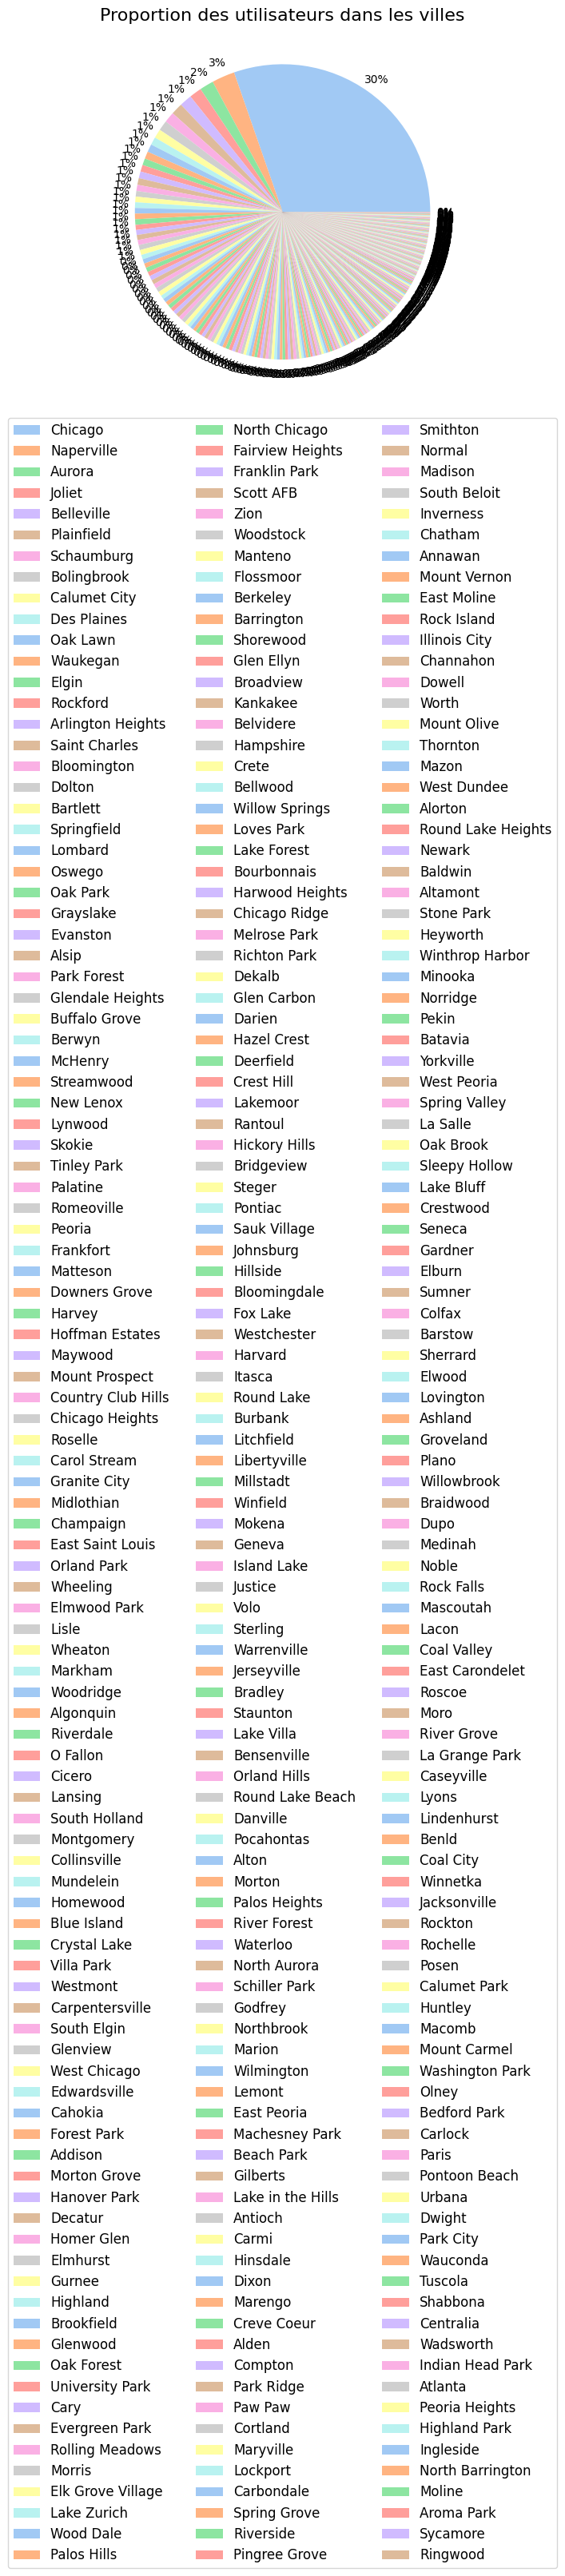

In [25]:
city_num_user = df_users["City"].value_counts(dropna=False).reset_index()
city_num_user.columns = ["City", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")


# Créer un sous-tracé pour le diagramme circulaire et le diagramme en barres
plt.figure(figsize=(14, 6))

# Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(city_num_user["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Proportion des utilisateurs dans les villes", fontsize=16)
plt.legend(city_num_user["City"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

Quelques observation:
- Environ 30% des utilisateurs vivent à Chicago

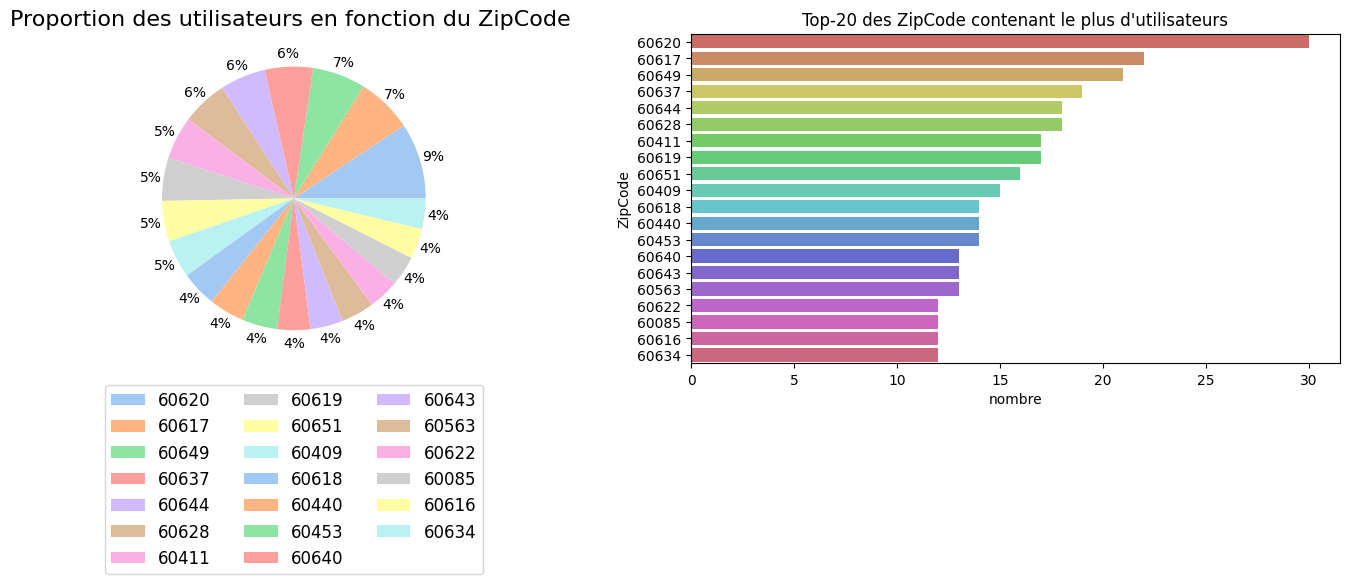

In [26]:
"""
Vérifions en détail les catégories uniques dans la colonne "ZipCode" des caractéristiques d'emplacement.
"""
zip_num_user = df_users["ZipCode"].value_counts(dropna=False).reset_index()[:20]
zip_num_user.columns = ["ZipCode", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")


# Créer un sous-tracé pour le diagramme circulaire et le diagramme en barres
plt.figure(figsize=(14, 6))

# Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(zip_num_user["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Proportion des utilisateurs en fonction du ZipCode ", fontsize=16)
plt.legend(zip_num_user["ZipCode"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)


# Diagramme en barres
plt.subplot(1, 2, 2)
sns.barplot(x="nombre", y="ZipCode", data=zip_num_user, color="blue", palette="hls").set(title="Top-20 des ZipCode contenant le plus d'utilisateurs");
plt.tight_layout()
plt.show()

### `Observation des Variables manquantes`

UserID                  0.000000
City                    0.000000
State                   0.000000
Country                 0.000000
GraduationDate          0.000000
WorkHistoryCount        0.000000
ManagedOthers           0.000000
ManagedHowMany          0.000000
GraduationYear          0.000000
ZipCode                 0.001225
TotalYearsExperience    0.012868
CurrentlyEmployed       0.126225
DegreeType              0.134804
MajorCategoryID         0.136642
Major                   0.137255
dtype: float64


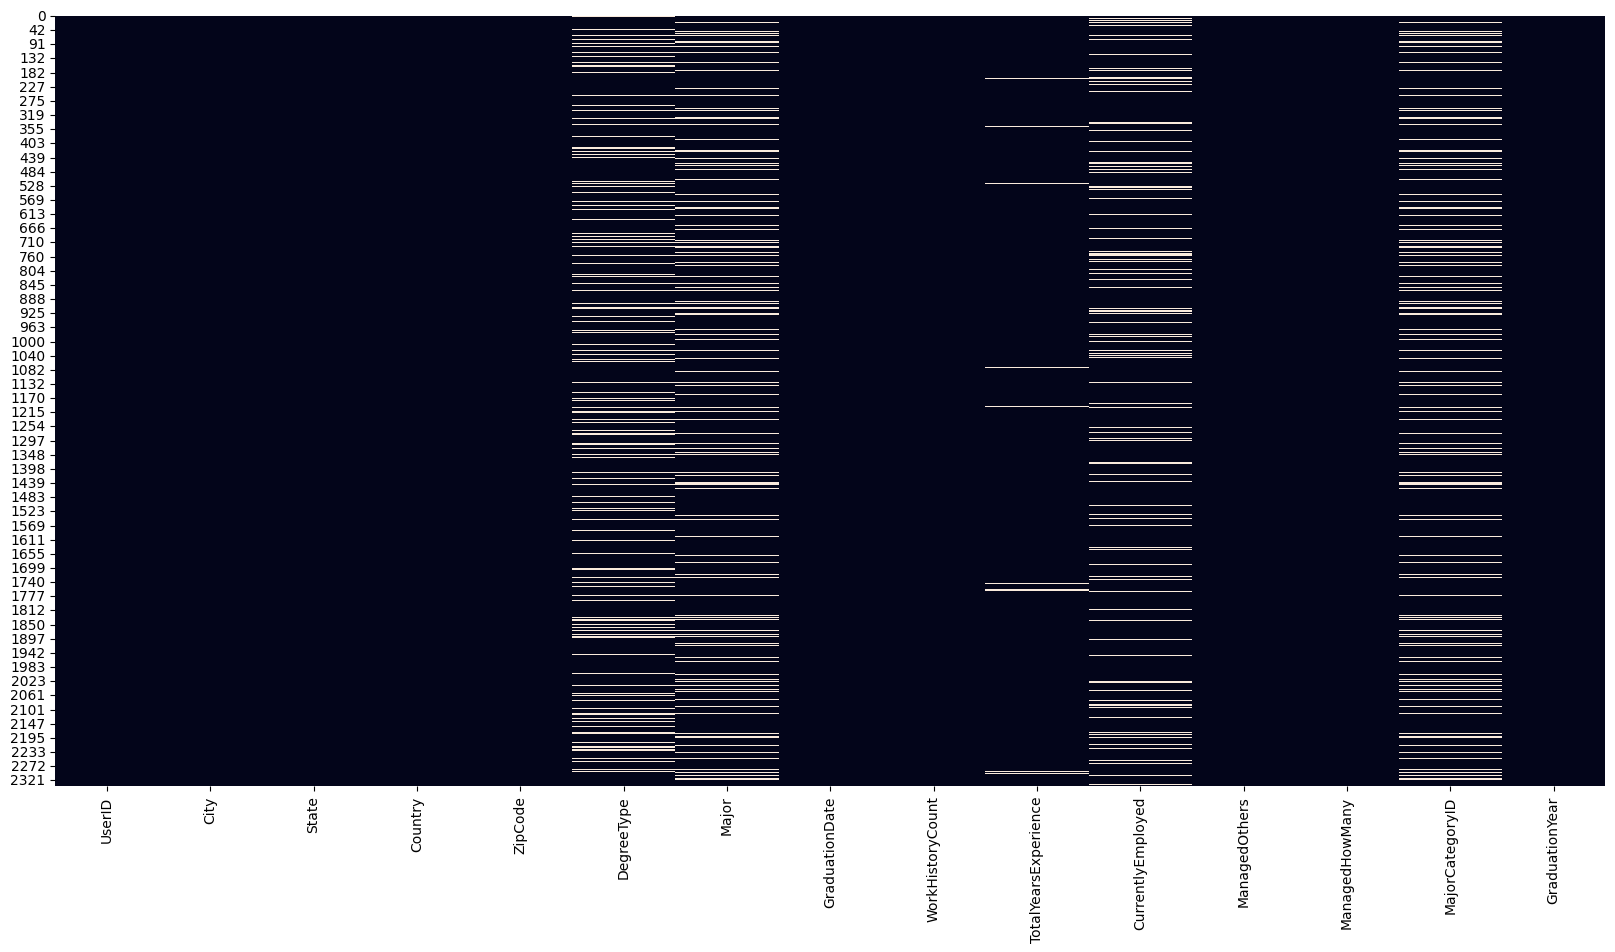

In [27]:
"""
Distribution des valeurs manquantes selon les données
"""

# Nombre de valeurs NaN dans chaque colonne
number_na = df_users.isna().sum()

# On écrit le pourcentage de valeurs manquantes dans que l'on trie dans l'ordre croissant
percent_na = (number_na/df_users.shape[0]).sort_values(ascending=True)
print(percent_na)

# Affichons les valeurs manquantes dans une heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_users.isna(), cbar=False)
plt.show()

Le graphique montre que les valeurs manquantes sont majoritairement sur les points suivant:

* Toutes les caractéristiques des diplômes
* TotalYearsExperience et CurrentlyEmployed

Intuition: Les premières caractéristiques semblent êtres celles qui permettent de recommander un job et influer sur l'Event 'View' dans feedbacks alors que les deuxièmes seraient sûrement déterminantes pour se faire embaucher.

In [28]:
display(df_users)

UserID            City State Country     ZipCode   DegreeType  \
0          23  Mount Prospect    IL      US       60056  High School   
2        2305     Lake Forest    IL      US       60045          NaN   
3        2785         Chicago    IL      US       60607   Bachelor's   
5        4182         Burbank    IL      US       60459  Associate's   
6        4768      Romeoville    IL      US       60446  High School   
...       ...             ...   ...     ...         ...          ...   
2329  1468879      Belleville    IL      US       62221   Bachelor's   
2330  1469183      Naperville    IL      US  60564-4847   Bachelor's   
2332  1469784         Chicago    IL      US       60647     Master's   
2334  1470245         Chicago    IL      US       60608   Bachelor's   
2335  1470394          Dekalb    IL      US       60115   Bachelor's   

                                 Major GraduationDate  WorkHistoryCount  \
0                       Not Applicable     2002-01-01                 3   
2                            insurance     2010-12-01                 4   
3                International Affairs     2005-01-01                 6   
5             Administrative Assistant     2011-12-01                 3   
6                       Not Applicable     1995-01-01                 5   
...                                ...            ...               ...   
2329               Business Management     2012-12-01                 5   
2330  Computer Science and Mathematics     1981-01-01                 6   
2332                           Finance     1997-01-01                 6   
2334                           Finance     1996-06-01                11   
2335                           Finance     2012-05-01                 3   

      TotalYearsExperience CurrentlyEmployed ManagedOthers  ManagedHowMany  \
0                     10.0               Yes            No               0   
2                      9.0               Yes            No               0   
3                     10.0               Yes            No               0   
5                      4.0               Yes            No               0   
6                      5.0               Yes            No               0   
...                    ...               ...           ...             ...   
2329                  17.0               Yes           Yes              10   
2330                  30.0               Yes           Yes             187   
2332                  19.0               NaN            No               0   
2334                  16.0               Yes            No               0   
2335                   2.0                No            No               0   

      MajorCategoryID  GraduationYear  
0                 0.0          2002.0  
2               180.0          2010.0  
3               191.0          2005.0  
5                20.0          2011.0  
6                 0.0          1995.0  
...               ...             ...  
2329             21.0          2012.0  
2330             98.0          1981.0  
2332             79.0          1997.0  
2334             79.0          1996.0  
2335             79.0          2012.0  

[1632 rows x 15 columns]

In [29]:
# On enleve la colonne GraduationDate
df_users = df_users.drop(['GraduationDate'], axis=1)

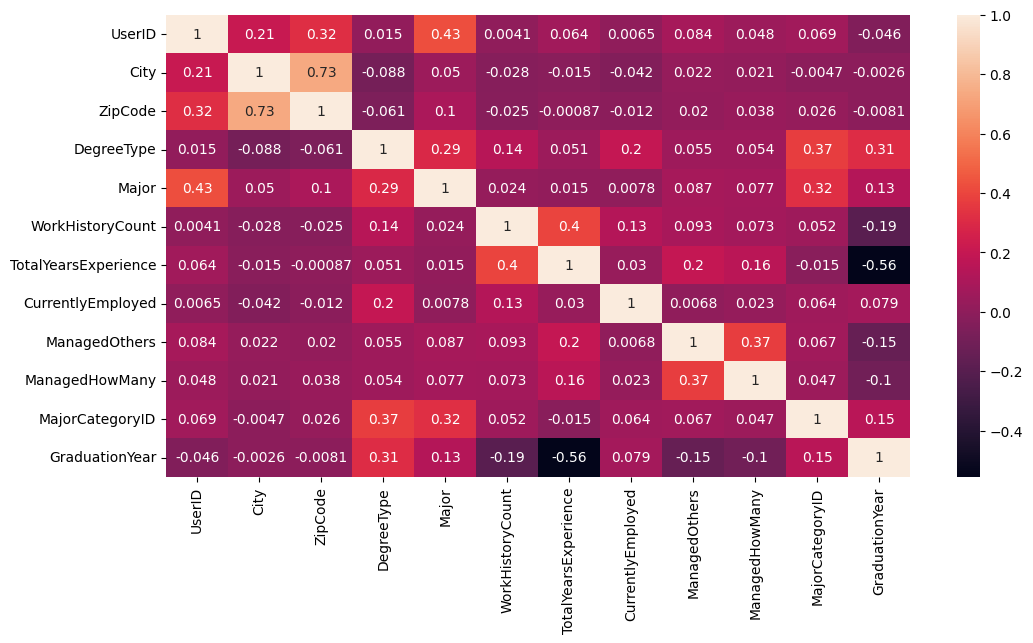

In [30]:
# Enleve les valeurs manquantes 
df_users.dropna(axis=0)

# Créer un dictionnaire pour mapper les catégories de 'DegreeType' avec des variables entières
degree_type_mapping = {'vocational': 0, 'High School': 1, "Associate's": 2, "Bachelor's": 3, "Master's": 4, 'PhD': 5}

# Appliquer le mapping à la colonne 'DegreeType'
df_users['DegreeType'] = df_users['DegreeType'].map(degree_type_mapping)

# Mappez les événements 'No' à 0 et 'Yes' à 1 pour la colonne 'CurrentlyEmployed'
df_users['CurrentlyEmployed'] = df_users['CurrentlyEmployed'].map({'No': 0, 'Yes': 1})

# Mappez les événements 'No' à 0 et 'Yes' à 1 pour la colonne 'ManagedOthers'
df_users['ManagedOthers'] = df_users['ManagedOthers'].map({'No': 0, 'Yes': 1})

# Créer un dictionnaire pour mapper les major avec des variables entières
major_mapping = {major: i for i, major in enumerate(df_users['Major'].unique())}
    
# Appliquer le mapping à la colonne 'major'
df_users['Major'] = df_users['Major'].map(major_mapping)

# Créer un dictionnaire pour mapper les villes avec des variables entières
city_mapping = {city: i for i, city in enumerate(df_users['City'].unique())}
    
# Appliquer le mapping à la colonne 'City'
df_users['City'] = df_users['City'].map(city_mapping)
    
# Créer un dictionnaire pour mapper les codes postaux avec des variables entières
zip_mapping = {Zip: i for i, Zip in enumerate(df_users['ZipCode'].unique())}
    
# Appliquer le mapping à la colonne 'City'
df_users['ZipCode'] = df_users['ZipCode'].map(zip_mapping)

# Sélectionner uniquement les colonnes numériques
numeric_columns = df_users.select_dtypes(include='number').dropna(axis=0)

# Plot the correlation matrix with clusters
plt.figure(figsize=(12,6))
sns.heatmap(numeric_columns.corr(),annot=True)
plt.show()

Quelques observations:
- On remarque que les corrélations les plus élevés sont entre le ZipCode et la Ville (plus de 70%) et entre l'année de graduation et le nombre d'années d'expérience professionnelle (+ de 50%)
- Pour le reste, elle ne dépasse pas les 45%

On pourra donc se contenter seulement soit de la ville soit du ZipCode, pour l'année de graduation et des années d'exp pro, on pourra tester si cela améliore significativement le modèle.

***

## <center> USERS_HISTORY DATASET

### `Information Totale`

Lisons le jeu de données dans le DataFrame *users_history* et jetons un coup d'œil à sa *forme, ses colonnes, les types de données des colonnes et les cinq premières lignes des données*.

Cela nous donnera un aperçu succinct des données en notre possession.

In [31]:
# Lecture du fichier csv
print(f"Forme des données: {df_users_history.shape}\n")

display(df_users_history.head(5))
display(df_users_history.info())

Forme des données: (11012, 4)



UserID  Sequence                                          JobTitle  \
0      23         1                                           Manager   
1      23         2                               Assisting customers   
2     698         1                                  Advocate Bromenn   
3     698         2  Customer Service, Patient contact, drawing blood   
4     698         3              Customer Service, Suggestive selling   

   JobCategoryID  
0            0.0  
1           30.0  
2           88.0  
3          135.0  
4            1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11012 entries, 0 to 11011
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         11012 non-null  int64  
 1   Sequence       11012 non-null  int64  
 2   JobTitle       11012 non-null  object 
 3   JobCategoryID  11012 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 344.2+ KB


None

### **Exploration du contenu des variables**

Le jeu de données est dédié aux utilisateurs enregistrés sur la plateforme et contient 11012 lignes et 4 colonnes.

Dans ce dataset les caractéristiques sont seulement liées aux jobs :

* UserID : Id du candidat
* Sequence : Ordre de l’emploi occupé
* JobTitle : Intitulé de l’emploi occupé
* JobCategoryID : Categorie du métier

     
Premier avis: Il faudra tenter d'associer un utilisateur avec certaines catégories de métier et de diplôme à une autre catégorie de métier.

In [32]:
"""
Définition des catégories uniques dans chaque colonnes
"""
unique_list = []

for col in df_users_history.columns:
    # creating tuple: column name, number of unique values, type
    item = (col, df_users_history[col].nunique(), df_users_history[col].dtypes, df_users_history[col].unique())
    unique_list.append(item)
    
unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column_Name", "Num_Unique", "Type", "Unique_category"]
).sort_values(by="Num_Unique")


display(unique_counts)

Column_Name  Num_Unique     Type  \
1       Sequence          13    int64   
3  JobCategoryID         197  float64   
0         UserID        2509    int64   
2       JobTitle        7273   object   

                                     Unique_category  
1        [1, 2, 3, 4, 5, 6, 7, 9, 8, 10, 11, 12, 13]  
3  [0.0, 30.0, 88.0, 135.0, 1.0, 77.0, 103.0, 27....  
0  [23, 698, 2305, 2785, 3406, 4182, 4768, 5080, ...  
2  [Manager, Assisting customers, Advocate Bromen...

Quelques observations:
- Il y a plusieurs UserID pouvant être associés à differents jobs selon un ordre défini.
- Il y a plus de UserID dans l'historique que de UserID sur la plateforme (peut être certain sont effacé de la plateforme ?)

***

### Caractéristiques professionnelles
- Sequence : Ordre de l’emploi occupé
- JobTitle : Intitulé de l’emploi occupé
- JobCategoryID : Categorie du métier

***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


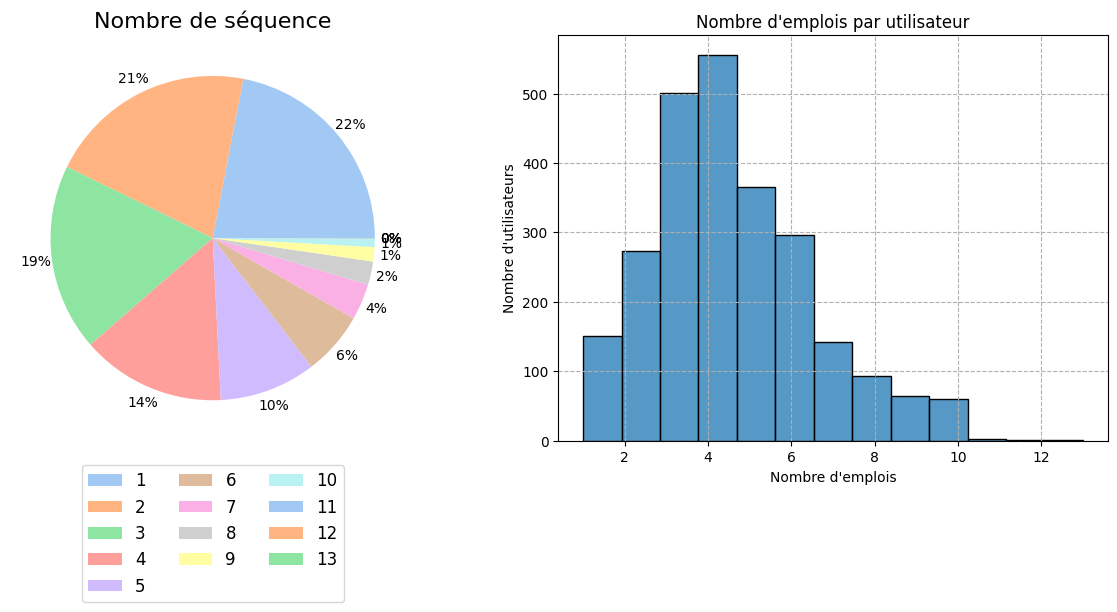

In [33]:
"""
Vérifions en détail les catégories uniques dans la colonne "Sequence" des caractéristiques pro.
"""
seq_num = df_users_history["Sequence"].value_counts(dropna=False).reset_index()
seq_num.columns = ["Sequence", "nombre"]

# Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

# Créer un sous-tracé pour le diagramme circulaire
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(seq_num["nombre"], colors=couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Nombre de séquence", fontsize=16)
plt.legend(seq_num["Sequence"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

# Vérifions en détail le nombre de jobs que les utilisateurs ont eu
user_job_count = df_users_history.groupby('UserID')['Sequence'].nunique()

# Créer un sous-tracé pour l'histogramme
plt.subplot(1, 2, 2)
sns.histplot(user_job_count, bins=user_job_count.max())
plt.title("Nombre d'emplois par utilisateur")
plt.xlabel("Nombre d'emplois")
plt.ylabel("Nombre d'utilisateurs")
plt.grid(ls='--')

plt.tight_layout()
plt.show()


Plus des 3/4 des utilisateurs ont eu entre 1 et 4 métiers et cela correspond à peu près bien au graphique précédent sur le WorkHistoryCount.

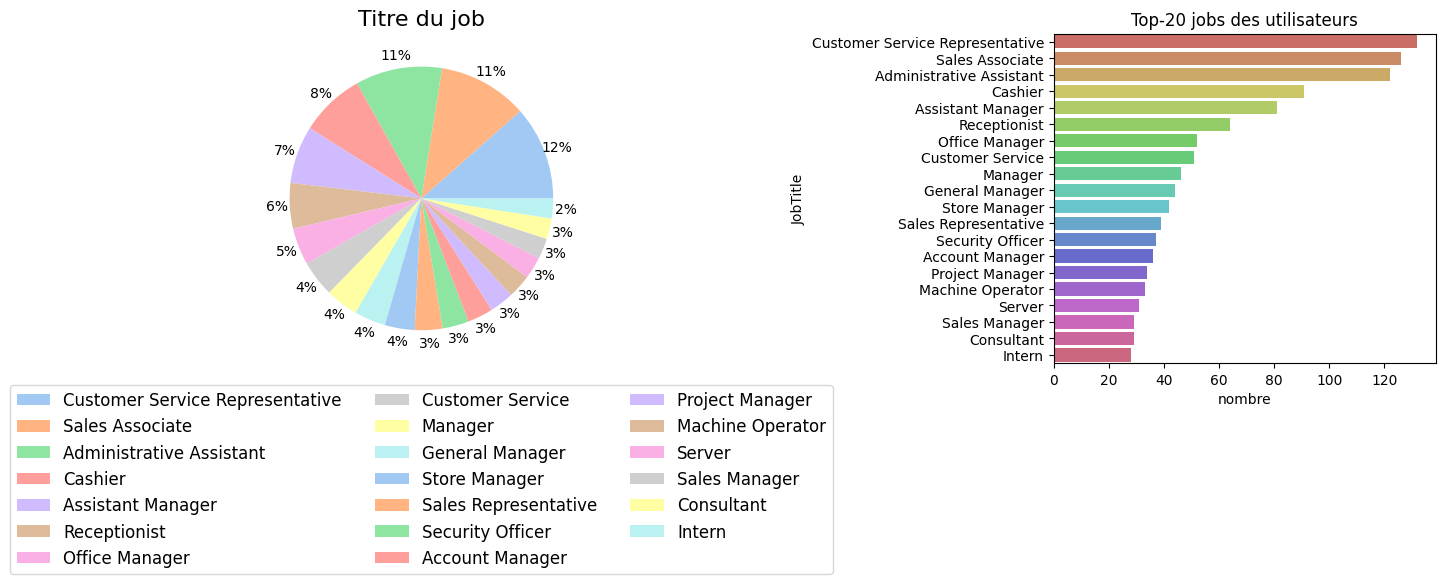

In [34]:
"""
Vérifions en détail les catégories uniques dans la colonne "JobTitle" des caractéristiques pro.
"""
jobtit_user = df_users_history["JobTitle"].value_counts(dropna=False).reset_index()[:20]
jobtit_user.columns = ["JobTitle", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")


# Créer un sous-tracé pour le diagramme circulaire et le diagramme en barres
plt.figure(figsize=(14, 6))

# Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(jobtit_user["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Titre du job", fontsize=16)
plt.legend(jobtit_user["JobTitle"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)


# Diagramme en barres
plt.subplot(1, 2, 2)
sns.barplot(x="nombre", y="JobTitle", data=jobtit_user, color="blue", palette="hls").set(title="Top-20 jobs des utilisateurs");
plt.tight_layout()
plt.show()

Remarquons que sur le top 20 des métiers utilisateurs presque 1/2 sont des métiers associés au management.

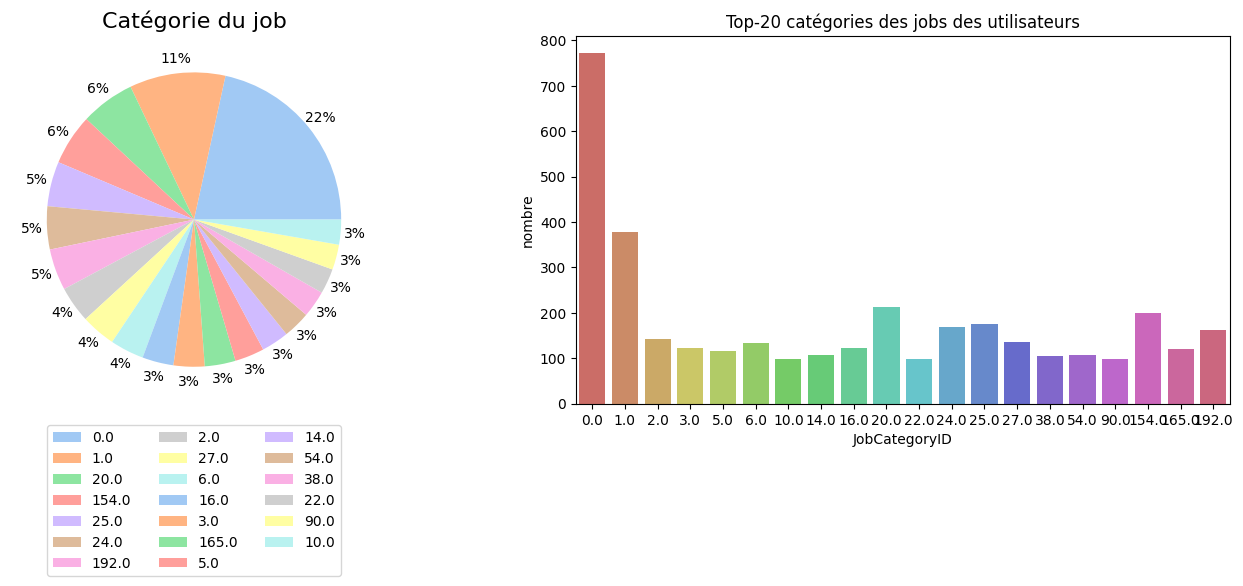

In [35]:
"""
Vérifions en détail les catégories uniques dans la colonne "JobCategoryID" des caractéristiques pro.
"""
jobcat_user = df_users_history["JobCategoryID"].value_counts(dropna=False).reset_index()[:20]
jobcat_user.columns = ["JobCategoryID", "nombre"]

# Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

# Créer un sous-tracé pour le diagramme circulaire et le diagramme en barres
plt.figure(figsize=(14, 6))

# Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(jobcat_user["nombre"], colors=couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Catégorie du job", fontsize=16)
plt.legend(jobcat_user["JobCategoryID"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=10)

# Diagramme en barres
plt.subplot(1, 2, 2)
sns.barplot(x="JobCategoryID", y="nombre", data=jobcat_user, color="blue", palette="hls").set(title="Top-20 catégories des jobs des utilisateurs");

plt.tight_layout()
plt.show()

In [36]:
list_20_cat = df_users_history["JobCategoryID"].value_counts(dropna=False).reset_index()[:20]["JobCategoryID"].to_list()
for i in list_20_cat:
    display(df_users_history[df_users_history["JobCategoryID"]==i])

UserID  Sequence                                     JobTitle  \
0           23         1                                      Manager   
37       11060         3                      Patrol partnership mgmt   
39       11060         5                            Territory Manager   
43       11400         6                            Knowledge Manager   
52       12924         3                                    Homemaker   
...        ...       ...                                          ...   
10885  1464536         1                                 Site Manager   
10940  1468160         1                                    Registrar   
10965  1468879         1                           Logistical Manager   
10985  1469784         3  McClendon Morrison & Partners Broker Dealer   
11006  1471500         1                                      Stocker   

       JobCategoryID  
0                0.0  
37               0.0  
39               0.0  
43               0.0  
52               0.0  
...              ...  
10885            0.0  
10940            0.0  
10965            0.0  
10985            0.0  
11006            0.0  

[772 rows x 4 columns]

UserID  Sequence                                           JobTitle  \
4          698         3               Customer Service, Suggestive selling   
51       12924         2             Customer Service/ Sales Representative   
150      27754         2                Customer Service Representative III   
198      38242         3                    Customer Service Representative   
259      44505         2                                   Customer Service   
...        ...       ...                                                ...   
10792  1458917         1                        Customer Service Specialist   
10793  1458917         2                    Customer Service/Administrative   
10796  1458917         5  Eligibility Coordinator / Customer Service Spe...   
10869  1463192         4                 Customer Service Associate/Cashier   
10908  1465407         1  Customer Service Supervisor and Deduction Analyst   

       JobCategoryID  
4                1.0  
51               1.0  
150              1.0  
198              1.0  
259              1.0  
...              ...  
10792            1.0  
10793            1.0  
10796            1.0  
10869            1.0  
10908            1.0  

[377 rows x 4 columns]

UserID  Sequence                                     JobTitle  \
123      21727         3                     Administrative Assistant   
124      21727         4           Executive Administrative Assistant   
218      40564         3  Interim Director's Administrative Assistant   
220      40564         5    Superintendant's Administrative Assistant   
339      63254         4                     ADMINISTRATIVE ASSISTANT   
...        ...       ...                                          ...   
10507  1433321         1                     Administrative Assistant   
10743  1455364         2       Administrative Assistant - CEO and CFO   
10768  1456130         8               Sales Administrative Assistant   
10784  1458384         9                     Administrative Assistant   
10786  1458900         1                   Administrative Coordinator   

       JobCategoryID  
123             20.0  
124             20.0  
218             20.0  
220             20.0  
339             20.0  
...              ...  
10507           20.0  
10743           20.0  
10768           20.0  
10784           20.0  
10786           20.0  

[213 rows x 4 columns]

UserID  Sequence                                         JobTitle  \
12        2785         3  Consultative Sales Associate, The Great Indoors   
71       14980         1                  Cashier/ Linens Sales Associate   
72       14980         2                         Cashier/ Sales Associate   
117      21412         5                                  Sales Associate   
183      36829         1                                  Sales Associate   
...        ...       ...                                              ...   
10564  1440306         4                           Senior Sales Associate   
10565  1440306         5                           Senior Sales Associate   
10566  1440306         6                           Senior Sales Associate   
10629  1445368         3                           Retail Sales Associate   
10806  1459281         9                                  Sales Associate   

       JobCategoryID  
12             154.0  
71             154.0  
72             154.0  
117            154.0  
183            154.0  
...              ...  
10564          154.0  
10565          154.0  
10566          154.0  
10629          154.0  
10806          154.0  

[200 rows x 4 columns]

UserID  Sequence                  JobTitle  JobCategoryID
30        7834         3                   Cashier           25.0
199      38242         4         Checker (Cashier)           25.0
201      38435         2       Gas Station Cashier           25.0
384      71152         3  Cashier/Office Assistant           25.0
498     102996         2                   Cashier           25.0
...        ...       ...                       ...            ...
10385  1419229         2                   CASHIER           25.0
10431  1423622         5                   Cashier           25.0
10432  1423622         6              Cage Cashier           25.0
10435  1424150         3             Cashier/Clerk           25.0
10663  1449816         3                   Cashier           25.0

[176 rows x 4 columns]

UserID  Sequence                                           JobTitle  \
16        3406         1                                  Office Supervisor   
119      21617         2                          Office Manager/Bookkeeper   
120      21617         3                                         Bookkeeper   
133      24848         1                   Medical Assistant/Office Manager   
187      36829         5                        Work-study Office Assistant   
...        ...       ...                                                ...   
10825  1460396         7                                     Office Manager   
10833  1460939         4  Setup remote access for director and office ma...   
10896  1464984         1                                     Office Manager   
10923  1467065         1                          Business Office Associate   
10967  1468879         3                                     Office Manager   

       JobCategoryID  
16              24.0  
119             24.0  
120             24.0  
133             24.0  
187             24.0  
...              ...  
10825           24.0  
10833           24.0  
10896           24.0  
10923           24.0  
10967           24.0  

[169 rows x 4 columns]

UserID  Sequence                               JobTitle  JobCategoryID
46       11844         1  Associate Assistant Account Executive          192.0
322      61403         1                 Key holder/second asst          192.0
334      62729         8    Direct Account Sales Representative          192.0
532     111372         3               Senior Account Executive          192.0
533     111372         4  Premium Sales Group Account Executive          192.0
...        ...       ...                                    ...            ...
10581  1440737         5       Senior Executive Account Manager          192.0
10730  1454484         2             Commercial Account Manager          192.0
10809  1459534         1                      Account Executive          192.0
10813  1459534         5               Market Account Executive          192.0
10814  1459534         6                      Account Executive          192.0

[163 rows x 4 columns]

UserID  Sequence                      JobTitle  JobCategoryID
29        7834         2            Resident Assistant            2.0
118      21617         1          Bookkeeper Assistant            2.0
151      27754         3         Orthodontic Assistant            2.0
185      36829         3  Work-study Theatre Assistant            2.0
189      36829         7  Work-study Theatre Assistant            2.0
...        ...       ...                           ...            ...
10170  1390993         6       Assistant Parts Manager            2.0
10500  1432087         1            Traccess Assistant            2.0
10590  1441284         6  Assistant Facilities Manager            2.0
10691  1452425         3        Assistant Dock Manager            2.0
10728  1454462         3      Assistant Branch Manager            2.0

[143 rows x 4 columns]

UserID  Sequence                                           JobTitle  \
7         2305         2                                Project Coordinator   
9         2305         4                                Project Coordinator   
69       14744         3                              Project Manager (IMO)   
186      36829         4                                Project Coordinator   
301      57362         1  Senior Project Manager and client representati...   
...        ...       ...                                                ...   
10672  1449816        12                                            Project   
10673  1449816        13                                            Project   
10722  1454348         3                             Truss Project Engineer   
10742  1455364         1                                  Project Assistant   
10954  1468463         4                 Project Manager for Sarbanes-Oxley   

       JobCategoryID  
7               27.0  
9               27.0  
69              27.0  
186             27.0  
301             27.0  
...              ...  
10672           27.0  
10673           27.0  
10722           27.0  
10742           27.0  
10954           27.0  

[136 rows x 4 columns]

UserID  Sequence                                  JobTitle  \
18        3406         3  Programming Supervisor, Master Scheduler   
242      42284         2                       Printing Supervisor   
243      42284         3                       Printing Supervisor   
337      63254         2                        TRAFFIC SUPERVISOR   
376      71131         2                           Site Supervisor   
...        ...       ...                                       ...   
10689  1452425         1                Utility Stewart Supervisor   
10693  1452425         5                      Stockroom Supervisor   
10758  1456040         5                2000 Sanitation Supervisor   
10791  1458900         6                           Bank Supervisor   
10938  1467671         3                      Operation Supervisor   

       JobCategoryID  
18               6.0  
242              6.0  
243              6.0  
337              6.0  
376              6.0  
...              ...  
10689            6.0  
10693            6.0  
10758            6.0  
10791            6.0  
10938            6.0  

[133 rows x 4 columns]

UserID  Sequence                                   JobTitle  \
116      21412         4             Telephone Sales Representative   
284      48505         2                  Trade Show Representative   
289      48894         4                       Sales Representative   
453      87197         3               Reimbursement Representative   
627     120929         5                       Sales Representative   
...        ...       ...                                        ...   
10627  1445368         1  Telecommunications Service Representative   
10677  1450533         4                       Sales Representative   
10749  1455534         3            Merchant Service Representative   
10810  1459534         2                   Telesales Representative   
10817  1459534         9                       Sales Representative   

       JobCategoryID  
116             16.0  
284             16.0  
289             16.0  
453             16.0  
627             16.0  
...              ...  
10627           16.0  
10677           16.0  
10749           16.0  
10810           16.0  
10817           16.0  

[123 rows x 4 columns]

UserID  Sequence                          JobTitle  JobCategoryID
64       14674         2                Payroll Specialist            3.0
168      30786         3  Residential Treatment Specialist            3.0
296      52839         3                  Photo Specialist            3.0
342      64557         3     Telecommunications Specialist            3.0
343      64557         4             Enrollment Specialist            3.0
...        ...       ...                               ...            ...
10767  1456130         7             Deductions Specialist            3.0
10829  1460619         3             Investment Specialist            3.0
10895  1464744        10                     PC Specialist            3.0
10922  1466613         5                    Bid Specialist            3.0
10924  1467065         2             Employment Specialist            3.0

[122 rows x 4 columns]

UserID  Sequence                                          JobTitle  \
172      31058         3                                 Assistant Manager   
173      31058         4                                 Assistant Manager   
277      48368         3                                 Assistant manager   
444      85000         1                                 Assistant Manager   
502     103627         5                                 Assistant Manager   
...        ...       ...                                               ...   
9872   1350481         3  Restaurant Assistant Manager since February 2006   
10173  1392470         2                                 Assistant Manager   
10250  1402740         2                                 Assistant Manager   
10278  1406723         3                                 Assistant Manager   
10279  1406723         4                                 Assistant Manager   

       JobCategoryID  
172            165.0  
173            165.0  
277            165.0  
444            165.0  
502            165.0  
...              ...  
9872           165.0  
10173          165.0  
10250          165.0  
10278          165.0  
10279          165.0  

[121 rows x 4 columns]

UserID  Sequence             JobTitle  JobCategoryID
55       13552         2       MRI Technician            5.0
224      41791         1  technician/Optician            5.0
226      41791         3  technician/optician            5.0
227      41791         4  technician/optician            5.0
271      46716         2   Molding Technician            5.0
...        ...       ...                  ...            ...
10890  1464744         5   Refresh Technician            5.0
10892  1464744         7   Install Technician            5.0
10897  1464984         2       CAD Technician            5.0
10963  1468875         4      Test Technician            5.0
10964  1468875         5  Analyzer Technician            5.0

[116 rows x 4 columns]

UserID  Sequence                                  JobTitle  \
179      34768         1                        Jewelry Consultant   
282      48439         2                                Consultant   
354      66239         1  Consultant to homes and small businesses   
504     104064         1                         Travel Consultant   
775     131720         2                                Consultant   
...        ...       ...                                       ...   
10946  1468298         5                                Consultant   
10970  1469183         1                                CONSULTANT   
10976  1469336         1                                Consultant   
10977  1469336         2                                Consultant   
10993  1470245         1                                CONSULTANT   

       JobCategoryID  
179             14.0  
282             14.0  
354             14.0  
504             14.0  
775             14.0  
...              ...  
10946           14.0  
10970           14.0  
10976           14.0  
10977           14.0  
10993           14.0  

[108 rows x 4 columns]

UserID  Sequence                         JobTitle  JobCategoryID
114      21412         2    Security/Receptionist Officer           54.0
269      45957         3                     Receptionist           54.0
335      62729         9                     Receptionist           54.0
865     136965         1                     receptionist           54.0
866     136965         2                M.A/ Receptionist           54.0
...        ...       ...                              ...            ...
10486  1430223         4                     Receptionist           54.0
10508  1433321         2  Receptionist/Transfer Assistant           54.0
10549  1439575         6    Receptionist / General Office           54.0
10582  1441271         1                     Receptionist           54.0
10609  1443597         2             Day Spa Receptionist           54.0

[107 rows x 4 columns]

UserID  Sequence                     JobTitle  JobCategoryID
245      42587         2             Security Officer           38.0
246      42587         3  Security Officer/Supervisor           38.0
264      44918         1             Security officer           38.0
315      59192         1               Security Guard           38.0
636     122419         1       Security Administrator           38.0
...        ...       ...                          ...            ...
10800  1459281         3  Diector, Security Assurance           38.0
10801  1459281         4    Senior Security Architect           38.0
10802  1459281         5           Security Architect           38.0
10887  1464536         3          Security Supervisor           38.0
10982  1469336         7               UNIX Architect           38.0

[105 rows x 4 columns]

UserID  Sequence                                           JobTitle  \
251      44288         4  Chaperone and driver for van tours (supervisin...   
940     140358         6                            Commercial Route Driver   
1555    195551         4                                             Driver   
1593    198047         1                                       Route Driver   
1713    209553         2                                       Delivery Man   
...        ...       ...                                                ...   
10631  1445465         2                                             Driver   
10633  1445465         4                       Driver/HeadMechanic/Operator   
10634  1445465         5                                             Driver   
10635  1445465         6                                             Driver   
10871  1464444         2                                         OTR Driver   

       JobCategoryID  
251             22.0  
940             22.0  
1555            22.0  
1593            22.0  
1713            22.0  
...              ...  
10631           22.0  
10633           22.0  
10634           22.0  
10635           22.0  
10871           22.0  

[99 rows x 4 columns]

UserID  Sequence                     JobTitle  JobCategoryID
95       18111         4            Sr. Sales Manager           90.0
97       18111         6         Senior Sales Manager           90.0
98       18111         7                Sales Manager           90.0
161      29126         3  Technical and Sales Manager           90.0
208      39558         3          Car Sales & Manager           90.0
...        ...       ...                          ...            ...
10239  1400337         4                Sales Manager           90.0
10528  1437707         2         Direct Sales Manager           90.0
10530  1437707         4            Sales Manager B2B           90.0
10624  1444890         3      Assistant Sales Manager           90.0
10625  1444890         4     Assistance Sales Manager           90.0

[99 rows x 4 columns]

UserID  Sequence                                          JobTitle  \
237      42034         5  Chasing Hollywood(Documentary) - Camera Operator   
326      61403         5                                          operator   
487     101604         1                             Offset Press Operator   
488     101604         2                             Offset Press Operator   
490     101604         5                             Offset Press Operator   
...        ...       ...                                               ...   
10114  1384245         4                                      Bus Operator   
10116  1384245         6                                      Bus Operator   
10215  1398461         3     fork lfit operator,semi unloader.order picker   
10870  1464444         1                                      Bus Operator   
10900  1464984         5                                      CAD Operator   

       JobCategoryID  
237             10.0  
326             10.0  
487             10.0  
488             10.0  
490             10.0  
...              ...  
10114           10.0  
10116           10.0  
10215           10.0  
10870           10.0  
10900           10.0  

[98 rows x 4 columns]

Il semblent que certaines de catégories de jobs ne correspondent pas à leur titre. Les titres semblent être trop précis. Nous considèrerons seulement les catégories pour les récommendations.

UserID           0.0
Sequence         0.0
JobTitle         0.0
JobCategoryID    0.0
dtype: float64


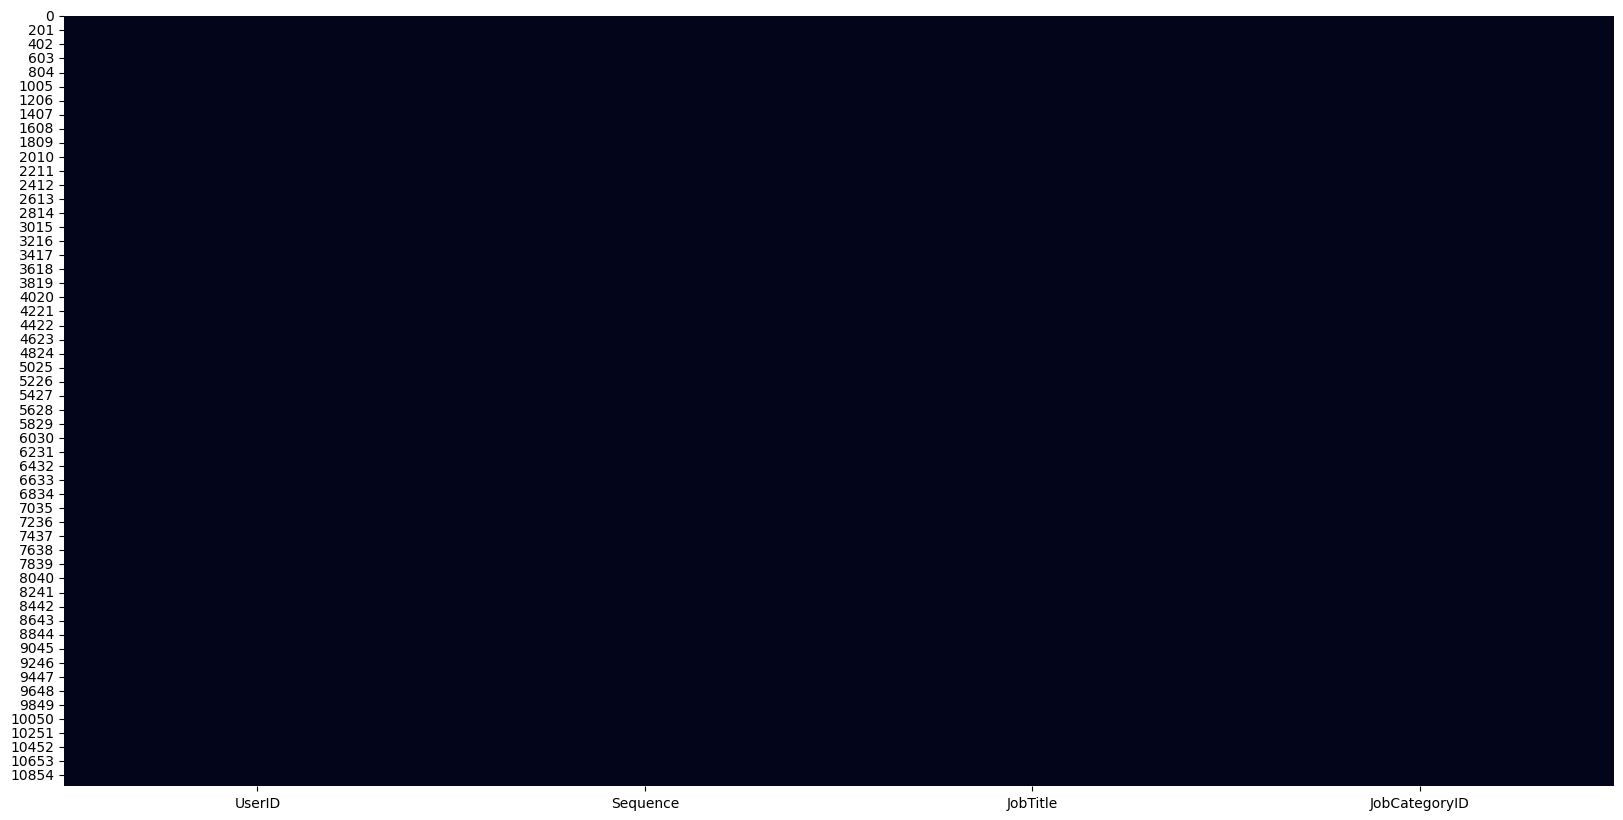

In [37]:
"""
Distribution des valeurs manquantes selon les données
"""

# Nombre de valeurs NaN dans chaque colonne
number_na = df_users_history.isna().sum()

# On écrit le pourcentage de valeurs manquantes dans que l'on trie dans l'ordre croissant
percent_na = (number_na/df_users_history.shape[0]).sort_values(ascending=True)
print(percent_na)

# Affichons les valeurs manquantes dans une heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_users_history.isna(), cbar=False)
plt.show()

***

## <center> JOBS DATASET

### `Information Totale`

Lisons le jeu de données dans le DataFrame *jobs* et jetons un coup d'œil à sa *forme, ses colonnes, les types de données des colonnes et les cinq premières lignes des données*.

Cela nous donnera un aperçu succinct des données en notre possession.

In [38]:
# Lecture du fichier csv
print(f"Forme des données: {df_jobs.shape}\n")

display(df_jobs.head(5))
display(df_jobs.info())

Forme des données: (4291, 11)



JobID                           Title  \
0     75        Administrative Assistant   
1    505                        LAB TECH   
2    764           Travel-Seasonal Staff   
3    766  MARKETING/ Social Media intern   
4    781                  Printing Sales   

                                         Description  \
0  The Administrative Assistant must be reliable ...   
1  S. Florida Medical Device Co. seeks QC Lab Tec...   
2  <p>Travel-Seasonal Staff </p> <p> CB331736 Ros...   
3  <p>Marketing Rep </p> <p> CB326227 Chicago </p...   
4  <p>Printing Sales Experienced, outside sales w...   

                                        Requirements           City State  \
0  Please refer to the Job Description to view th...        Houston    TX   
1  General knowledge of scientific or clinical la...     Plantation    FL   
2  Please refer to the Job Description to view th...    Des Plaines    IL   
3  Please refer to the Job Description to view th...        Chicago    IL   
4  Please refer to the Job Description to view th...  Schiller Park    IL   

  Country     Zip5                StartDate              EndDate  \
0      US  77036.0  2012-03-30 01:23:57.737  2012-04-29 23:59:59   
1      US  33313.0  2012-03-23 04:48:17.063  2012-04-22 23:59:59   
2      US  60018.0  2012-03-18 05:19:04.863  2012-04-17 23:59:59   
3      US  60606.0   2012-03-22 10:33:46.89  2012-04-21 23:59:59   
4      US  60176.0  2012-04-01 01:16:40.797  2012-04-30 23:59:59   

   JobCategoryID  
0             20  
1            137  
2             59  
3            141  
4              4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   JobID          4291 non-null   int64  
 1   Title          4291 non-null   object 
 2   Description    4291 non-null   object 
 3   Requirements   4025 non-null   object 
 4   City           4291 non-null   object 
 5   State          4291 non-null   object 
 6   Country        4291 non-null   object 
 7   Zip5           3096 non-null   float64
 8   StartDate      4291 non-null   object 
 9   EndDate        4291 non-null   object 
 10  JobCategoryID  4291 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 368.9+ KB


None

### **Exploration du contenu des variables**

Le jeu de données est dédié aux jobs enregistrés sur la plateforme et contient 4291 lignes et 11 colonnes.

Divisons toutes les caractéristique en 2 groupes :
- Emplacement
- Description du job

*Emplacement du job
- Country: nom complet du pays
- State: nom complet de l'état
- City: nom complet de la ville
- Zip5 : code postal de l'emplacement

*Description du job
- JobID : Id de l’emploi
- JobCategoryID : Categorie du métier
- Title : Intitulé
- Description : Description du poste
- Requirements : Prérequis pour le poste
- StartDate, EndDate : Date de début et fin de visibilité du poste sur le site d’annonce


Quelques observations sur les données :
* Toutes les lignes sont uniques
     
Premier avis: Remarquons que des jobs sont dans d'autres états que l'Illinois aux Etats-Unis. Pour le moment on retire la colonne Zip5.

In [39]:
"""
Define Unique categories in each column
"""
unique_list = []

for col in df_jobs.columns:
    # creating tuple: column name, number of unique values, type
    item = (col, df_jobs[col].nunique(), df_jobs[col].dtypes, df_jobs[col].unique())
    unique_list.append(item)
    
unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column_Name", "Num_Unique", "Type", "Unique_category"]
).sort_values(by="Num_Unique")


display(unique_counts)

Column_Name  Num_Unique     Type  \
6         Country           1   object   
5           State          37   object   
9         EndDate          42   object   
10  JobCategoryID         195    int64   
4            City         585   object   
7            Zip5         769  float64   
3    Requirements        3308   object   
1           Title        3432   object   
2     Description        4112   object   
0           JobID        4291    int64   
8       StartDate        4291   object   

                                      Unique_category  
6                                                [US]  
5   [TX, FL, IL, TN, CA, NC, MO, IN, NY, SC, MA, W...  
9   [2012-04-29 23:59:59, 2012-04-22 23:59:59, 201...  
10  [20, 137, 59, 141, 4, 60, 139, 148, 127, 75, 1...  
4   [Houston, Plantation, Des Plaines, Chicago, Sc...  
7   [77036.0, 33313.0, 60018.0, 60606.0, 60176.0, ...  
3   [Please refer to the Job Description to view t...  
1   [Administrative Assistant, LAB TECH, Travel-Se...  
2   [The Administrative Assistant must be reliable...  
0   [75, 505, 764, 766, 781, 782, 796, 1251, 1267,...  
8   [2012-03-30 01:23:57.737, 2012-03-23 04:48:17....

***

### Caractéristiques de l'emplacement du job

- Country: nom complet du pays
- State: nom complet de l'état
- City: nom complet de la ville
- Zip5 : code postal de l'emplacement


***

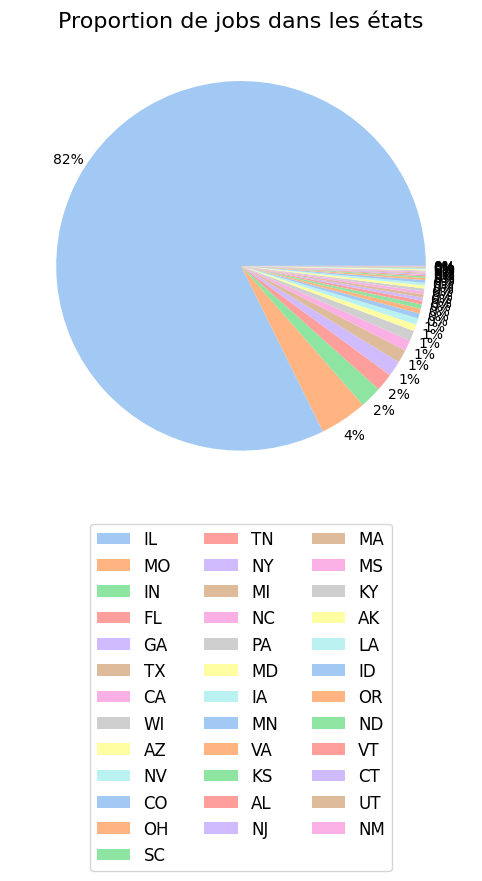

In [40]:
"""
Vérifions en détail les catégories uniques dans la colonne "State" des caractéristiques d'emplacement.
"""
state_num = df_jobs["State"].value_counts(dropna=False).reset_index()
state_num.columns = ["State", "nombre"]

# Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

# Créer un sous-tracé pour le diagramme circulaire
plt.figure(figsize=(12, 6))
plt.pie(state_num["nombre"], colors=couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Proportion de jobs dans les états", fontsize=16)
plt.legend(state_num["State"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)


Quelques observations:
- Seul des jobs aux Etats Unis sont représentés
- 82% des jobs se trouve dans l'Illinois.

Tous les utilisateurs de la plateforme sont aussi dans cet état. Nous allons donc supprimer tous les autres jobs qui ne font pas parti de l'Illinois.

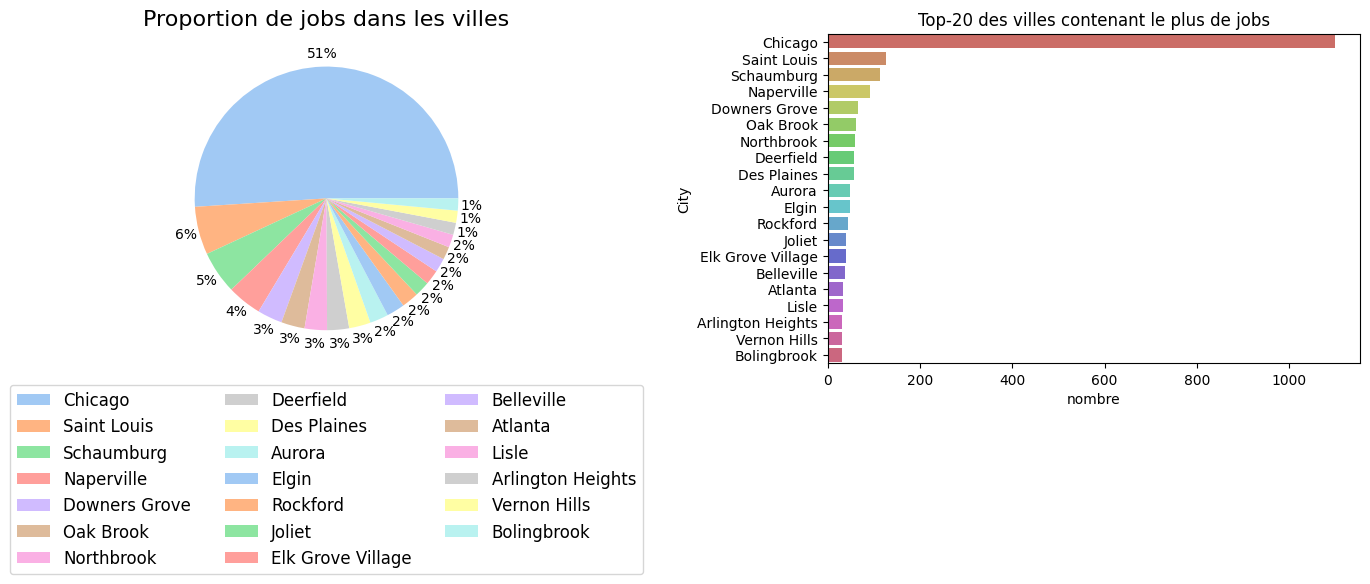

In [41]:
"""
Vérifions en détail les catégories uniques dans la colonne "City" des caractéristiques d'emplacement.
"""
city_num = df_jobs["City"].value_counts(dropna=False).reset_index()[:20]
city_num.columns = ["City", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")


# Créer un sous-tracé pour le diagramme circulaire et le diagramme en barres
plt.figure(figsize=(14, 6))

# Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(city_num["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Proportion de jobs dans les villes", fontsize=16)
plt.legend(city_num["City"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)


# Diagramme en barres
plt.subplot(1, 2, 2)
sns.barplot(x="nombre", y="City", data=city_num, color="blue", palette="hls").set(title="Top-20 des villes contenant le plus de jobs");
plt.tight_layout()
plt.show()

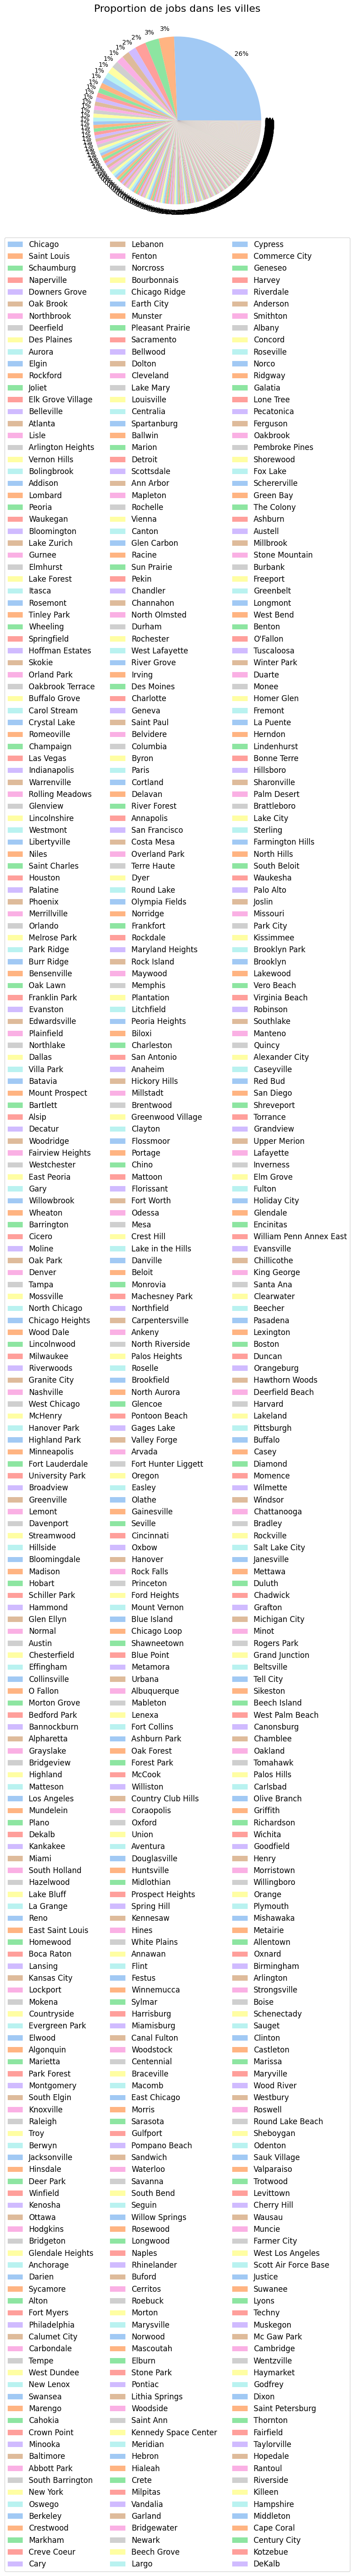

In [42]:
city_num = df_jobs["City"].value_counts(dropna=False).reset_index()
city_num.columns = ["City", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")


# Créer un sous-tracé pour le diagramme circulaire et le diagramme en barres
plt.figure(figsize=(14, 6))

# Diagramme circulaire
plt.pie(city_num["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Proportion de jobs dans les villes", fontsize=16)
plt.legend(city_num["City"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

Quelques observations:
- Seulement 25% des jobs se trouve à Chicago, le reste se trouve en majorité dans les grandes villes de l'état ou la périphérie de Chicago.

Certains utilisateurs pourraient se voir recommander des emplois en dehors de leur zone de résidence.

***

### Description du job

- JobID : Id de l’emploi
- JobCategoryID : Categorie du métier
- Title : Intitulé
- Description : Description du poste
- Requirements : Prérequis pour le poste
- StartDate, EndDate : Date de début et fin de visibilité du poste sur le site d’annonce

Pour le moment on laisse le titre, la description et les prérrequis.

***

In [43]:
"""
Vérifions en détail les catégories uniques dans la colonne "JobID" du job.
"""

# Compte le nombre d'unique UserID 
df_count_JobID = df_jobs['JobID'].value_counts().reset_index()
df_count_JobID.columns = ['JobID','Count']
print(df_count_JobID)

# Compte le nombre de ligne du dataset
print(f'Il y a {df_jobs.shape[0]} lignes dans le dataset')

        JobID  Count
0          75      1
1      778686      1
2      775819      1
3      775859      1
4      775909      1
...       ...    ...
4286   382149      1
4287   382173      1
4288   382487      1
4289   382814      1
4290  1115925      1

[4291 rows x 2 columns]
Il y a 4291 lignes dans le dataset


Les JobID sont uniques

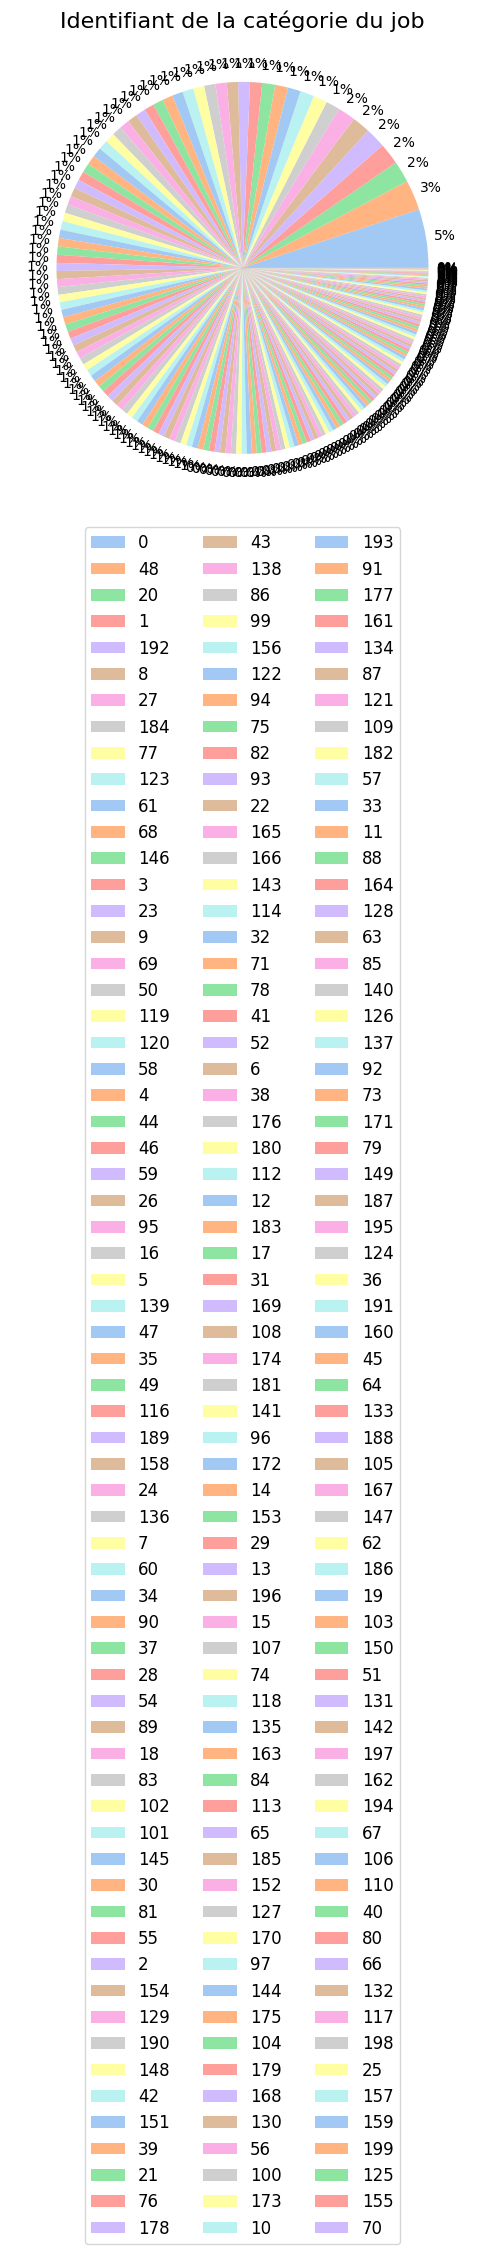

In [44]:
"""
Vérifions en détail les catégories uniques dans la colonne "JobCategoryID" du job.
"""
jobcat_type = df_jobs["JobCategoryID"].value_counts(dropna=False).reset_index()
jobcat_type.columns = ["JobCategoryID", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(jobcat_type["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Identifiant de la catégorie du job", fontsize=16)
plt.legend(jobcat_type["JobCategoryID"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

In [45]:
# Quelques informations sur les catégories des Jobs
print(df_jobs["JobCategoryID"].value_counts(dropna=False).reset_index())
print(f'La catégorie minimum est {df_jobs["JobCategoryID"].min()}')
print(f'La catégorie maximum est {df_jobs["JobCategoryID"].max()}')


     JobCategoryID  count
0                0    219
1               48    112
2               20     80
3                1     80
4              192     76
..             ...    ...
190            159      2
191            199      1
192            125      1
193            155      1
194             70      1

[195 rows x 2 columns]
La catégorie minimum est 0
La catégorie maximum est 199


Il y a 195 catégories représentées allant de 0 à 199. La question est maintenant de savoir si ses catégories correspondent aux catégories des domaines d'études.

In [46]:
"""
Analyse de la relation entre les catégories MajorCategoryID et les JobCategoryID
"""

df_major_info = df_users[['Major','MajorCategoryID']]
df_job_info = df_jobs[['Title','JobCategoryID']]

# Observation de l'utilisateur ayant été le plus actif
display(df_major_info[df_major_info['MajorCategoryID']== 180])


# Observation de l'utilisateur ayant été le plus actif
display(df_job_info[df_job_info['JobCategoryID']== 180])

Major  MajorCategoryID
2         1            180.0
1676    472            180.0

Title  JobCategoryID
464                                    Insurance Agents            180
465                                    Insurance Agents            180
821   Medicaid, Medicare, Medical Insurance Billers ...            180
1139                                 Insurance Providor            180
2070                            Farmers Insurance Agent            180
2156                              Insurance Sales Agent            180
2178                       Insurance Sales Agent Leader            180
2345  Life Insurance Agent - Sales - Marketing - Ins...            180
2537                              Insurance Sales Agent            180
2736                                   Insurance Agents            180
3264                            Farmers Insurance Agent            180
3316                   Insurance/Precertification Clerk            180
3519  Life Insurance Agent - Sales - Marketing - Ins...            180
3550                           Traffic Manager/Producer            180
3639                              Insurance Sales Agent            180
3804                                   Insurance Agents            180
3805                                   Insurance Agents            180
3899  Life Insurance Underwriting Trainee (Norhtbroo...            180
4003                 Insurance Administrative Assistant            180
4251                       Insurance Sales Agent Leader            180

Il semblerai que les MajorCategoryID et les JobCategoryID reflètent les mêmes catégories de métiers. Pour en être sur il faudra faire une analyse plus poussé.

Il y a 10 dates invalides


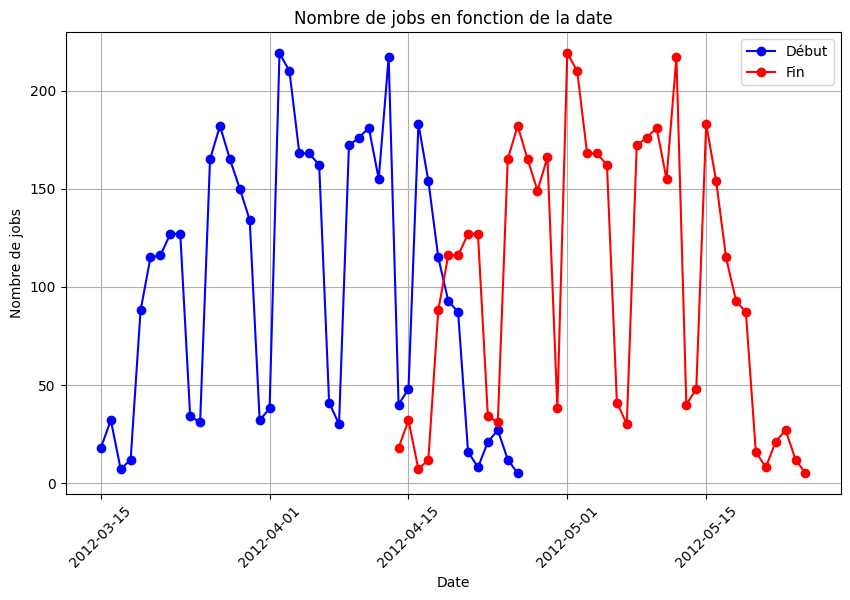

In [47]:
"""
Vérifions en détail les dates uniques dans la colonne "StartDate" et "EndDate" du job.
"""


# Convertir les colonnes de dates en objets de date/heure avec gestion des erreurs
df_jobs["StartDate"] = pd.to_datetime(df_jobs["StartDate"], errors='coerce')
df_jobs["EndDate"] = pd.to_datetime(df_jobs["EndDate"], errors='coerce')

# Supprimer l'heure des dates et ne conserver que la partie date
df_jobs["StartDate"] = df_jobs["StartDate"].dt.date
df_jobs["EndDate"] = df_jobs["EndDate"].dt.date

# Supprimer les lignes avec des dates invalides (NaT)
df_jobs.dropna(subset=["StartDate", "EndDate"], inplace=True)
print(f'Il y a {4291-df_jobs.shape[0]} dates invalides')

# Compter le nombre de jobs pour chaque date de début
job_count_by_start_date = df_jobs.groupby("StartDate").size()

# Compter le nombre de jobs pour chaque date de fin
job_count_by_end_date = df_jobs.groupby("EndDate").size()

# Tracer les dates de début en fonction du nombre de jobs
plt.figure(figsize=(10, 6))
plt.plot(job_count_by_start_date.index, job_count_by_start_date.values, marker='o', linestyle='-', color='blue', label='Début')

# Tracer les dates de fin en fonction du nombre de jobs
plt.plot(job_count_by_end_date.index, job_count_by_end_date.values, marker='o', linestyle='-', color='red', label='Fin')

plt.title("Nombre de jobs en fonction de la date")
plt.xlabel("Date")
plt.ylabel("Nombre de jobs")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Quelques observations:
- Pas sur que cette information soit utile.

### `Variables manquantes`

JobID            0.000000
Title            0.000000
Description      0.000000
City             0.000000
State            0.000000
Country          0.000000
StartDate        0.000000
EndDate          0.000000
JobCategoryID    0.000000
Requirements     0.062135
Zip5             0.278440
dtype: float64


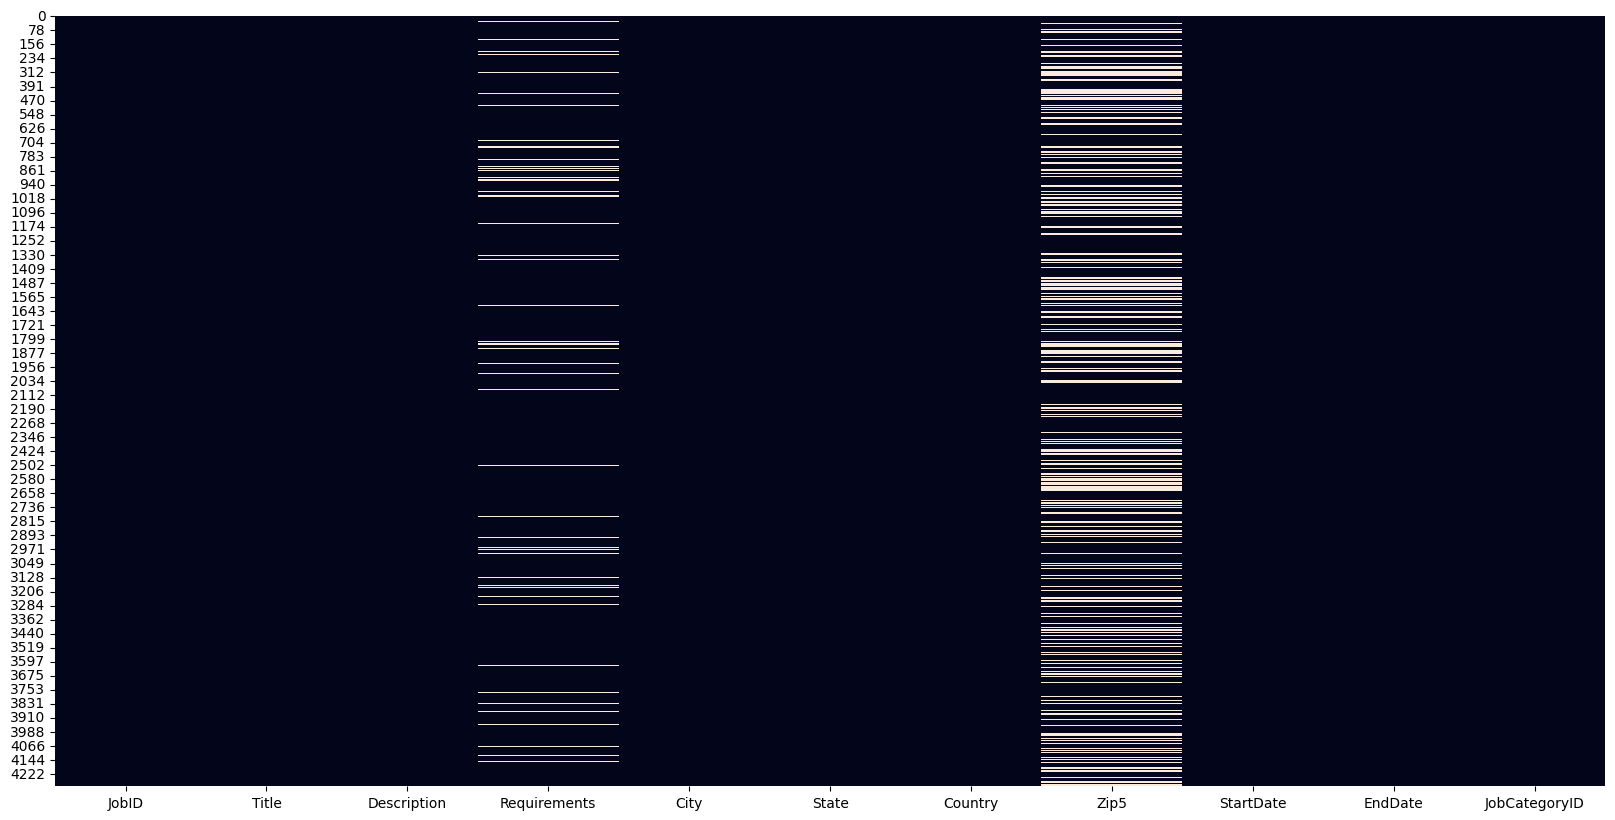

In [48]:
"""
Distribution des valeurs manquantes selon les données
"""

# Nombre de valeurs NaN dans chaque colonne
number_na = df_jobs.isna().sum()

# On écrit le pourcentage de valeurs manquantes dans que l'on trie dans l'ordre croissant
percent_na = (number_na/df_jobs.shape[0]).sort_values(ascending=True)
print(percent_na)

# Affichons les valeurs manquantes dans une heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_jobs.isna(), cbar=False)
plt.show()

***

## <center> FEEDBACKS DATASET

### `Information Totale`

Lisons le jeu de données dans le DataFrame *feedbacks* et jetons un coup d'œil à sa *forme, ses colonnes, les types de données des colonnes et les cinq premières lignes des données*.

Cela nous donnera un aperçu succinct des données en notre possession.

In [49]:
# Lecture du fichier csv
print(f"Forme des données: {df_feedbacks.shape}\n")

display(df_feedbacks.head(5))
display(df_feedbacks.info())

Forme des données: (28928, 3)



UserID    JobID   Event
0     698  1053272  viewed
1     698   535105  viewed
2     698   171400  viewed
3     698   804823  viewed
4     698  1113149  viewed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28928 entries, 0 to 28927
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserID  28928 non-null  int64 
 1   JobID   28928 non-null  int64 
 2   Event   28928 non-null  object
dtypes: int64(2), object(1)
memory usage: 678.1+ KB


None

### **Exploration du contenu des variables**

Le jeu de données est dédié aux retours enregistrés sur la plateforme et contient 28928 lignes et 3 colonnes.

Les caractéristiques sont:
- UserID: Id du candidat
- JobID : Id de l’emploi
- Event : type d’évènement loggé : offre vue sur la plateforme (viewed), candidature (applied), embauche (hired)
     

In [50]:
"""
Define Unique categories in each column
"""
unique_list = []

for col in df_feedbacks.columns:
    # creating tuple: column name, number of unique values, type
    item = (col, df_feedbacks[col].nunique(), df_feedbacks[col].dtypes, df_feedbacks[col].unique())
    unique_list.append(item)
    
unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column_Name", "Num_Unique", "Type", "Unique_category"]
).sort_values(by="Num_Unique")


display(unique_counts)

Column_Name  Num_Unique    Type  \
2       Event           3  object   
0      UserID        1861   int64   
1       JobID        3149   int64   

                                     Unique_category  
2                           [viewed, applied, hired]  
0  [698, 2305, 3406, 4182, 4768, 5080, 5954, 7834...  
1  [1053272, 535105, 171400, 804823, 1113149, 573...

In [51]:
"""
Vérifions en détail les catégories uniques dans la colonne "UserID".
"""

# Compte le nombre d'unique UserID 
df_count_UserID = df_feedbacks['UserID'].value_counts().reset_index()
df_count_UserID.columns = ['UserID','Count']
print(df_count_UserID)

       UserID  Count
0      894951    484
1      395528    230
2     1380956    207
3      781898    207
4      866319    176
...       ...    ...
1856   559172      6
1857   152946      6
1858   235955      6
1859   255920      6
1860   861263      6

[1861 rows x 2 columns]


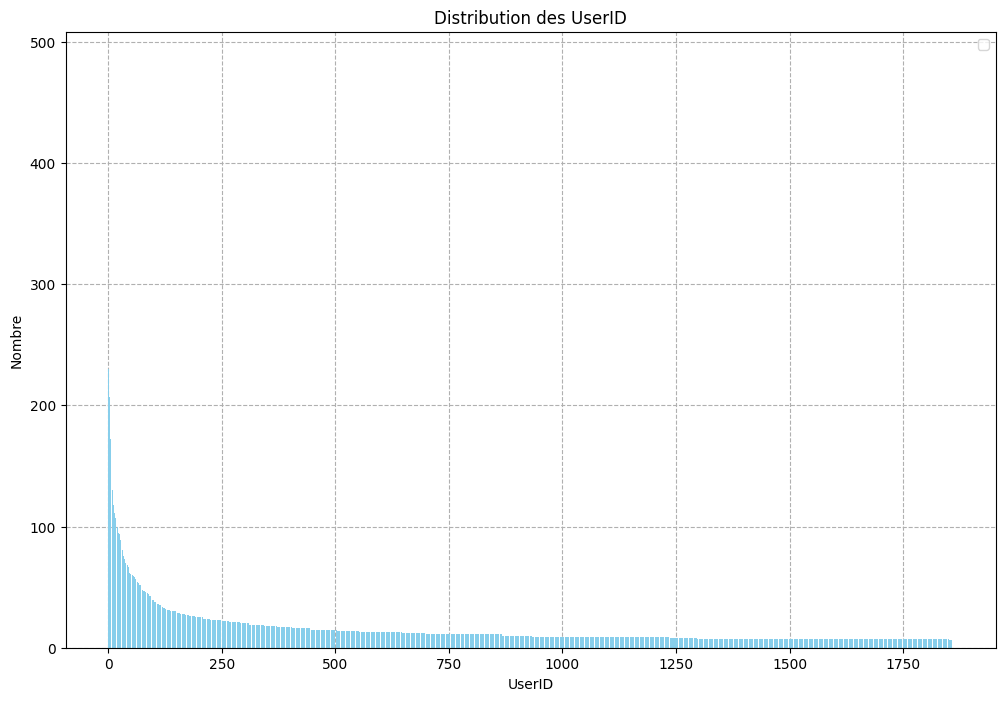

In [52]:
# Affiche le résultat dans un graphique
plt.figure(figsize=(12,8))
plt.bar(df_count_UserID.index, df_count_UserID['Count'], color='skyblue', zorder=2)
plt.xlabel('UserID')
plt.ylabel('Nombre')
plt.title('Distribution des UserID')
plt.legend()
plt.grid(ls='--')
plt.show()

Quelques observations:
- Il y a 1861 UserID différents dans le dataset
- Tous les utilisateurs apparaissent plusieurs fois dans le dataframe (allant de 6 fois à 484 fois)

In [53]:
"""
Vérifions en détail les catégories uniques dans la colonne "JobID".
"""

# Compte le nombre d'unique UserID 
df_count_JobID = df_feedbacks['JobID'].value_counts().reset_index()
df_count_JobID.columns = ['JobID','Count']
print(df_count_JobID)

        JobID  Count
0     1050985    217
1      896947    180
2      837446    172
3      386591    162
4       67025    160
...       ...    ...
3144   458577      2
3145   574284      2
3146  1098270      2
3147   623819      2
3148   323616      2

[3149 rows x 2 columns]


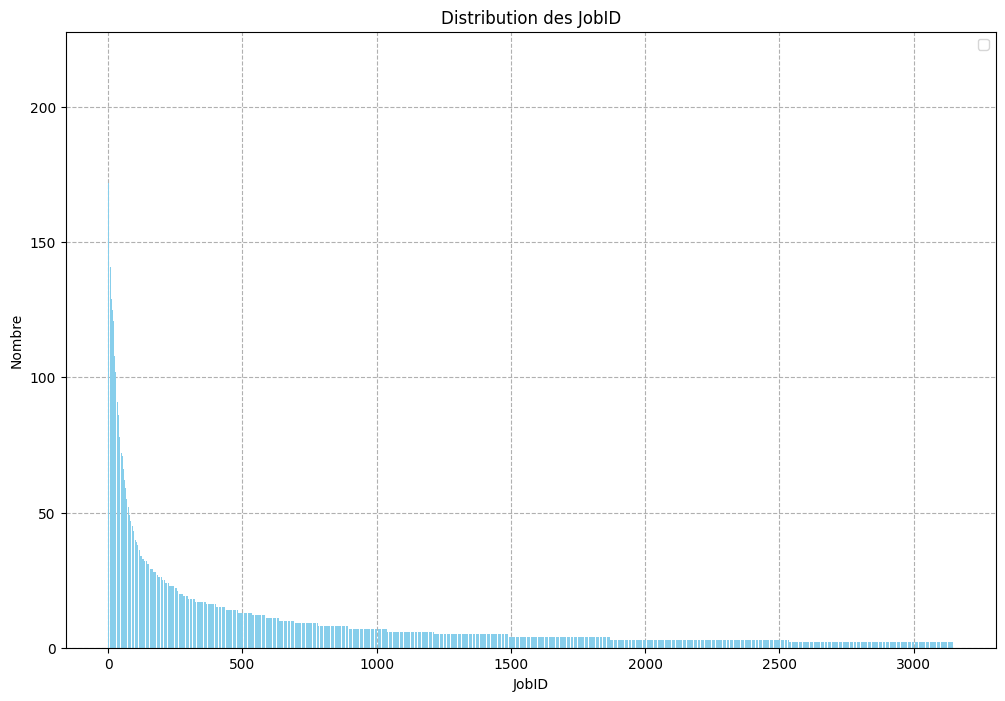

In [54]:
# Affiche le résultat dans un graphique
plt.figure(figsize=(12,8))
plt.bar(df_count_JobID.index, df_count_JobID['Count'], color='skyblue', zorder=2)
plt.xlabel('JobID')
plt.ylabel('Nombre')
plt.title('Distribution des JobID')
plt.legend()
plt.grid(ls='--')
plt.show()

Quelques observations:
- Il y a 3149 JobID différents dans le dataset
- Tous les jobs apparaissent plusieurs fois dans le dataframe (allant de 2 fois à 217 fois)

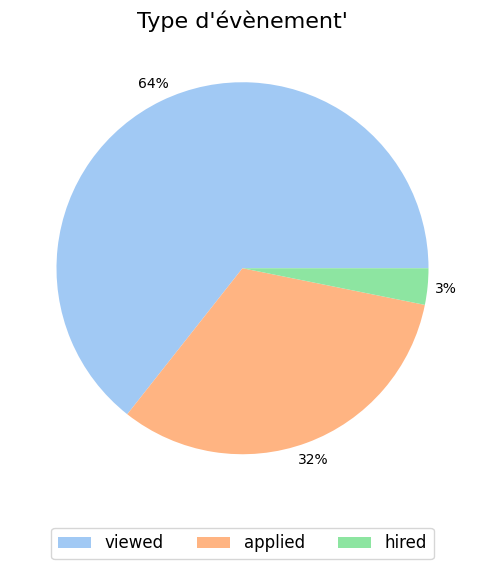

In [55]:
"""
Vérifions en détail les catégories uniques dans la colonne "Event".
"""

event_type = df_feedbacks["Event"].value_counts(dropna=False).reset_index()
event_type.columns = ["Event", "nombre"]

#Définir la palette de couleurs Seaborn à utiliser
couleurs = sns.color_palette("pastel")

#Créer un diagramme circulaire
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(event_type["nombre"], colors = couleurs, autopct="%.0f%%", pctdistance=1.1)
plt.title("Type d'évènement'", fontsize=16)
plt.legend(event_type["Event"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

Quelques observations:
- Les données cibles présentent un déséquilibre significatif, avec une prépondérance importante des événements 'viewed' par rapport aux 'hired'. 
- Environ 64% des données correspondent à des 'vues', 32% à des 'applied' et seulement 3% à des 'hired'. 

Cette observation soulève une question cruciale à explorer : est-il possible qu'une personne soit embauchée sans avoir consulté l'offre d'emploi préalablement ?

In [56]:
"""
Analyse de l'utilisateur le plus actif.
"""

# Observation de l'utilisateur ayant été le plus actif
display(df_feedbacks[df_feedbacks['UserID']==894951])

# Filtrer les données pour ne montrer que les lignes où l'ID de l'utilisateur est égal à 894951 et où l'événement est "applied"
display(df_feedbacks.query('UserID == 894951 and Event == "applied"'))

# Filtrer les données pour ne montrer que les lignes où l'ID de l'utilisateur est égal à 894951 et où l'événement est "hired"
display(df_feedbacks.query('UserID == 894951 and Event == "hired"'))
print(df_feedbacks.query('UserID == 894951 and Event == "hired"').shape)

UserID   JobID   Event
5296   894951  598446  viewed
5297   894951  280705  viewed
5298   894951  947844  viewed
5299   894951  761803  viewed
5300   894951  720259  viewed
...       ...     ...     ...
28529  894951  997569  viewed
28530  894951  300777  viewed
28531  894951  512697  viewed
28532  894951  729564  viewed
28533  894951  296936  viewed

[484 rows x 3 columns]

UserID   JobID    Event
14364  894951  931539  applied
14365  894951  160501  applied
14366  894951  317134  applied
14367  894951  564171  applied
14368  894951  961414  applied
...       ...     ...      ...
19183  894951  997569  applied
19184  894951  300777  applied
19185  894951  512697  applied
19186  894951  729564  applied
19187  894951  296936  applied

[229 rows x 3 columns]

UserID    JobID  Event
14382  894951     8315  hired
14385  894951   896220  hired
14396  894951   878359  hired
14403  894951    16758  hired
14420  894951   483050  hired
14429  894951   566702  hired
14446  894951   265547  hired
14449  894951  1041808  hired
14451  894951   203169  hired
14454  894951   523635  hired
14463  894951   945296  hired
14489  894951   899622  hired
14499  894951   837446  hired
14500  894951   458823  hired
14501  894951   365171  hired
14502  894951   348541  hired
14503  894951   997569  hired
14506  894951   300777  hired
14513  894951   512697  hired
14521  894951   729564  hired
14564  894951   296936  hired

(21, 3)


In [57]:
"""
Analyse des évènements.
"""

# Définition du dataframe viewed
df_viewed = df_feedbacks[df_feedbacks['Event']=='viewed'].reset_index()

# Définition du dataframe applied
df_applied = df_feedbacks[df_feedbacks['Event']=='applied'].reset_index()

# Définition du dataframe hired
df_hired = df_feedbacks[df_feedbacks['Event']=='hired'].reset_index()

# Filtrer les données pour ne montrer que les lignes où l'événement est "hired" mais pas "applied"
hired_not_applied = df_feedbacks[(df_feedbacks['Event'] == 'hired') & (~df_feedbacks['UserID'].isin(df_applied['UserID']))]

# Afficher les événements "hired" mais pas "applied"
print("Événements 'hired' mais pas 'applied' :")
print(hired_not_applied)

# Filtrer les données pour ne montrer que les lignes où l'événement est "applied" mais pas "viewed"
applied_not_viewed = df_feedbacks[(df_feedbacks['Event'] == 'applied') & (~df_feedbacks['UserID'].isin(df_viewed['UserID']))]

# Afficher les événements "hired" mais pas "applied"
print("Événements 'viewed' mais pas 'applied' :")
print(applied_not_viewed)

Événements 'hired' mais pas 'applied' :
Empty DataFrame
Columns: [UserID, JobID, Event]
Index: []
Événements 'viewed' mais pas 'applied' :
Empty DataFrame
Columns: [UserID, JobID, Event]
Index: []


Quelques observations:
- Un même utilisateur peut être à la fois "viewed", "applied" et "hired" et peut être embauché plusieurs fois pour des jobs différents.
- Un utilisateur ne peut pas postulé à un emploi sans l'avoir vu et ne peut pas être embauché sans avoir postulé (logique mais vallait mieux vérifier)

Il serait peut être donc intéressant de modifier le dataset de la manière suivante:
- Evènements 'just_viewed' qui est l'évènement 'viewed' sans être 'applied' ni 'hired'
- 'just_applied' qui est l'évènement 'viewed' et 'applied' sans être 'hired'
- 'just_hired' qui est l'évènement 'viewed' et 'applied' et 'hired'.

### `Relation variables/évènements`

In [58]:
"""
Analyse de la relation entre les évènements et les utilisateurs.
"""

# Grouper les données par UserID et compter le nombre d'occurrences des événements pour chaque utilisateur
viewed_counts = df_viewed.groupby('UserID').size()
applied_counts = df_applied.groupby('UserID').size()
hired_counts = df_hired.groupby('UserID').size()

# Afficher les statistiques descriptives
print("Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'view' par utilisateur :\n", viewed_counts.describe())
print("Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'applied' par utilisateur :\n", applied_counts.describe())
print("Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'hired' par utilisateur :\n", hired_counts.describe())

Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'view' par utilisateur :
 count    1861.000000
mean       10.005373
std        10.050195
min         5.000000
25%         6.000000
50%         7.000000
75%        10.000000
max       234.000000
dtype: float64
Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'applied' par utilisateur :
 count    1861.000000
mean        5.048361
std        10.104764
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       229.000000
dtype: float64
Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'hired' par utilisateur :
 count    549.000000
mean       1.663024
std        1.679991
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       21.000000
dtype: float64


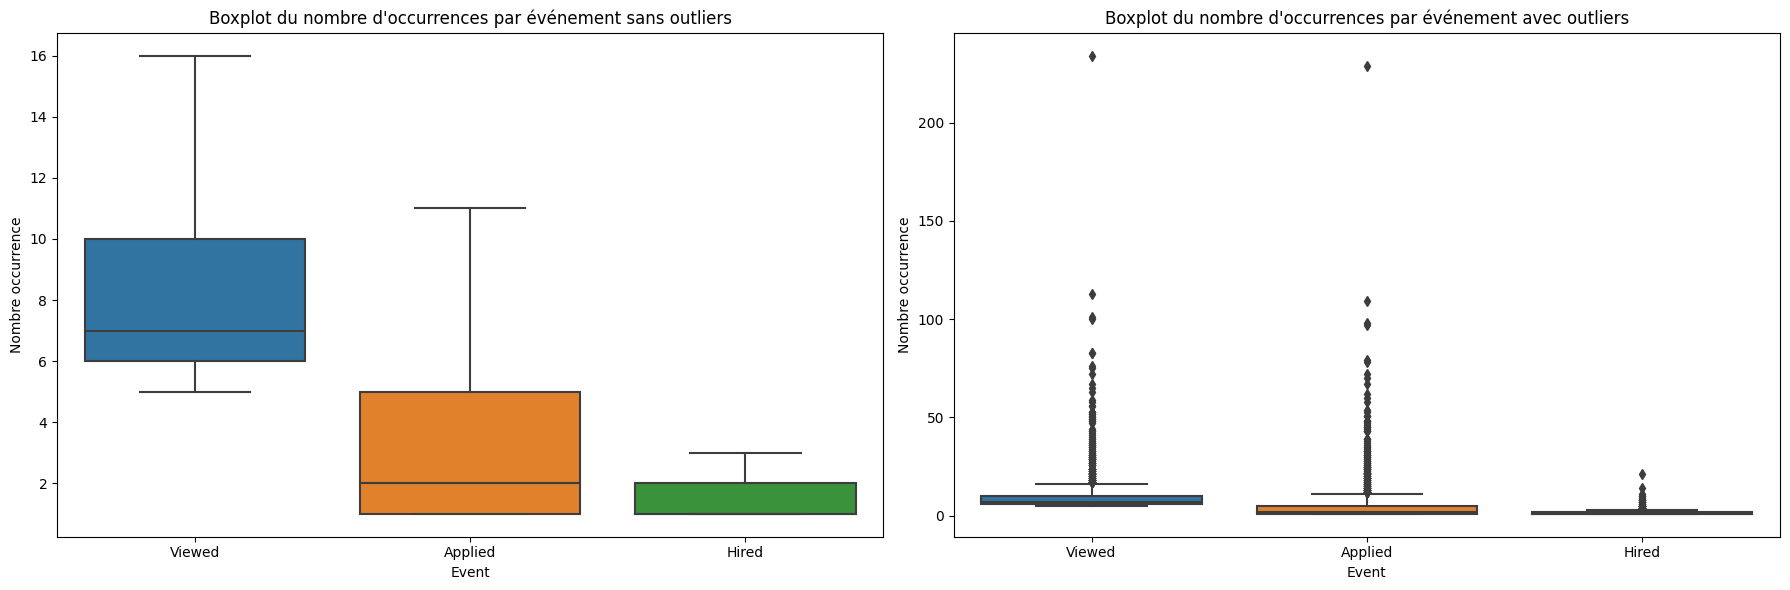

In [59]:
# Créer une figure et deux sous-graphiques côte à côte
plt.figure(figsize=(18, 6))

# Premier sous-graphique : boîte à moustaches sans outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=[viewed_counts, applied_counts, hired_counts], showfliers=False)
plt.xticks(ticks=[0, 1, 2], labels=['Viewed', 'Applied', 'Hired'])
plt.xlabel('Event')
plt.ylabel('Nombre occurrence')
plt.title('Boxplot du nombre d\'occurrences par événement sans outliers')

# Deuxième sous-graphique : boîte à moustaches avec outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=[viewed_counts, applied_counts, hired_counts], showfliers=True)
plt.xticks(ticks=[0, 1, 2], labels=['Viewed', 'Applied', 'Hired'])
plt.xlabel('Event')
plt.ylabel('Nombre occurrence')
plt.title('Boxplot du nombre d\'occurrences par événement avec outliers')

# Afficher les graphiques
plt.tight_layout()
plt.show()

Quelques observations:
- On remarque qu'il y a énormément d'outliers utilisateurs pour les évènements viewed et applied. Ce qui semble évident de par la facilité de voir des jobs et de postuler sur la plateforme (cela ne dépend pas des recruteurs qui embauchent).

In [60]:
"""
Analyse de la relation entre les évènements et les jobs.
"""

# Grouper les données par UserID et compter le nombre d'occurrences des événements pour chaque utilisateur
viewed_counts = df_viewed.groupby('JobID').size()
applied_counts = df_applied.groupby('JobID').size()
hired_counts = df_hired.groupby('JobID').size()


# Afficher les statistiques descriptives
print("Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'view' par job :\n", viewed_counts.describe())
print("Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'applied' par job :\n", applied_counts.describe())
print("Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'hired' par job :\n", hired_counts.describe())

Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'view' par job :
 count    3149.000000
mean        5.912988
std        10.636900
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       142.000000
dtype: float64
Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'applied' par job :
 count    3149.000000
mean        2.983487
std         5.401278
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        65.000000
dtype: float64
Affichage des statistiques descriptives pour le nombre d'occurrences des événements 'hired' par job :
 count    665.000000
mean       1.372932
std        0.969033
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
dtype: float64


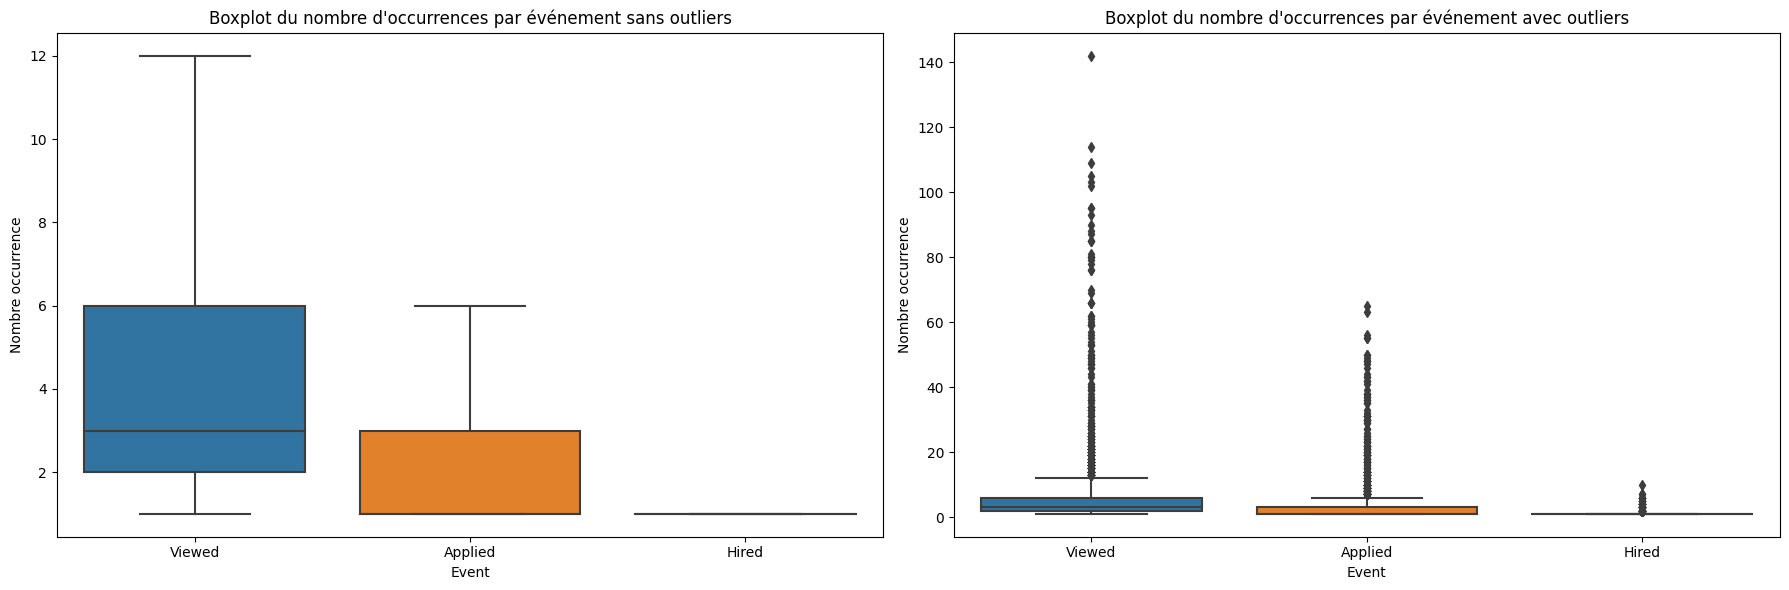

In [61]:
# Créer une figure et deux sous-graphiques côte à côte
plt.figure(figsize=(18, 6))

# Premier sous-graphique : boîte à moustaches sans outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=[viewed_counts, applied_counts, hired_counts], showfliers=False)
plt.xticks(ticks=[0, 1, 2], labels=['Viewed', 'Applied', 'Hired'])
plt.xlabel('Event')
plt.ylabel('Nombre occurrence')
plt.title('Boxplot du nombre d\'occurrences par événement sans outliers')

# Deuxième sous-graphique : boîte à moustaches avec outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=[viewed_counts, applied_counts, hired_counts], showfliers=True)
plt.xticks(ticks=[0, 1, 2], labels=['Viewed', 'Applied', 'Hired'])
plt.xlabel('Event')
plt.ylabel('Nombre occurrence')
plt.title('Boxplot du nombre d\'occurrences par événement avec outliers')

# Afficher les graphiques
plt.tight_layout()
plt.show()

Quelques observations:
- Remarquons que tous les jobs ont été vu par les utilisateurs et ont été sollicité. Mais seulement 665 jobID différents ont recruté sur les 913 différents qu'il y a.
- On se retrouve presque dans le même cas que pour les outliers utilisateurs.

***

## <center> RELATION ENTRE LES VARIABLES DES AUTRES DATASETS

### `Relations variables/Event
`

Le but est de recommander des jobs au utilisateurs qui ont le plus de chance d'aboutir à une embauche. On va donc analyser les relations qu'il y a entre les caractéristiques des utilisateurs ayant été embauché avec l'évènement 'hired' et celle qui ont été postulé sans avoir pu aboutir et avoir vu sans avoir candidater.

Commençons par définir les colonnes géographiques, professionnelles et académiques de l'utilisateur.

In [62]:
# Caractéristiques géo
geo_col = ['City','ZipCode']

# # Caractéristiques pro
exp_col = ['WorkHistoryCount','TotalYearsExperience','CurrentlyEmployed','ManagedOthers','ManagedHowMany']

# Caractéristiques académiques
edu_col = ['DegreeType','Major','MajorCategoryID','GraduationYear']


In [63]:
# Identifier les UserID et JobID embauchés
hired_users_jobs = df_feedbacks[df_feedbacks['Event'] == 'hired']

# Identifier les UserID et JobID postulé
applied_users_jobs = df_feedbacks[df_feedbacks['Event'] == 'applied']

# Identifier les UserID et JobID vues
viewed_users_jobs = df_feedbacks[df_feedbacks['Event'] == 'viewed']

# Créer un masque booléen pour identifier les index des lignes à conserver dans applied_users_jobs
indices_to_keep = ~applied_users_jobs.set_index(['UserID', 'JobID']).index.isin(hired_users_jobs.set_index(['UserID', 'JobID']).index)

# Appliquer le masque pour filtrer les lignes
applied_not_hired = applied_users_jobs[indices_to_keep]

# Identifier les UserID et JobID justes vues
viewed_not_hired_applied = viewed_users_jobs[~viewed_users_jobs.set_index(['UserID', 'JobID']).index.isin(hired_users_jobs.set_index(['UserID', 'JobID']).index) & ~viewed_users_jobs.set_index(['UserID', 'JobID']).index.isin(applied_users_jobs.set_index(['UserID', 'JobID']).index)]


In [64]:
# Fusionnons tous les datasets

# Fusionner le DataFrame des utilisateurs avec le DataFrame des historiques sur la colonne 'UserID'
merged_data_users_and_history = pd.merge(df_users, df_users_history, on="UserID", how="inner")

In [65]:
# Enlevons la colonne JobTitle
merged_data_users_and_history.drop(['JobTitle'], axis=1, inplace=True)

In [66]:
# Fusionner le DataFrame des utilisateurs embauchés avec le DataFrame des feedbacks sur la colonne 'UserID'
merged_data = pd.merge(df_users, df_feedbacks, on="UserID", how="inner")


# Mappez les événements 'viewed', 'applied' à 1 et 'hired' à 2
merged_data['Event'] = merged_data['Event'].map({'viewed':0,'applied': 1, 'hired': 2})

In [67]:
# Définissons un nouveau dataframe
df_job1 = df_jobs[['JobID', 'JobCategoryID','Zip5']]

# Fusionner les DataFrame sur la colonne 'JobID'
merged_data_gen = pd.merge(merged_data, df_job1, on="JobID", how="inner")

# Drop les States et Country
merged_data_gen.drop(['Country', 'State'], axis=1, inplace=True)


In [68]:
# Definition des dataset applied et hired
merged_data_gen_viewed = merged_data_gen[merged_data_gen['Event']==0]
merged_data_gen_applied = merged_data_gen[merged_data_gen['Event']==1]
merged_data_gen_hired = merged_data_gen[merged_data_gen['Event']==2]

# Forme des datasets
print(merged_data_gen_viewed.shape)
print(merged_data_gen_applied.shape)
print(merged_data_gen_hired.shape)



(12575, 16)
(6236, 16)
(609, 16)


In [69]:
display(merged_data_gen)

UserID  City  ZipCode  DegreeType  Major  WorkHistoryCount  \
0         2305     1        1         NaN      1                 4   
1         2305     1        1         NaN      1                 4   
2         2305     1        1         NaN      1                 4   
3         2305     1        1         NaN      1                 4   
4         2305     1        1         NaN      1                 4   
...        ...   ...      ...         ...    ...               ...   
19415  1470394   112      157         3.0     51                 3   
19416  1470394   112      157         3.0     51                 3   
19417  1470394   112      157         3.0     51                 3   
19418  1470394   112      157         3.0     51                 3   
19419  1470394   112      157         3.0     51                 3   

       TotalYearsExperience  CurrentlyEmployed  ManagedOthers  ManagedHowMany  \
0                       9.0                1.0              0               0   
1                       9.0                1.0              0               0   
2                       9.0                1.0              0               0   
3                       9.0                1.0              0               0   
4                       9.0                1.0              0               0   
...                     ...                ...            ...             ...   
19415                   2.0                0.0              0               0   
19416                   2.0                0.0              0               0   
19417                   2.0                0.0              0               0   
19418                   2.0                0.0              0               0   
19419                   2.0                0.0              0               0   

       MajorCategoryID  GraduationYear   JobID  Event  JobCategoryID     Zip5  
0                180.0          2010.0  573231      0             71  60601.0  
1                180.0          2010.0  173609      0            176  60634.0  
2                180.0          2010.0  758183      0             20  60606.0  
3                180.0          2010.0  796649      0              2  60194.0  
4                180.0          2010.0  863240      0             44  60602.0  
...                ...             ...     ...    ...            ...      ...  
19415             79.0          2012.0  365171      0             68  60523.0  
19416             79.0          2012.0  566702      0             13  60455.0  
19417             79.0          2012.0  339499      2             48      NaN  
19418             79.0          2012.0  339499      1             48      NaN  
19419             79.0          2012.0  339499      0             48      NaN  

[19420 rows x 16 columns]

Ce que nous cherchons ici, c'est à comprendre la relation entre les variables de ce jeu de données et la colonne des événements, tout en identifiant les caractéristiques qui ne nous sont pas utiles pour la suite de l'analyse.

Plutôt que d'aborder l'étude des relations de manière brute, nous devons adopter une approche plus subtile. Nous allons commencer par fixer une catégorie de poste spécifique et effectuer des tests sur le jeu de données correspondant. Cela nous permettra de déterminer avec précision quelles variables sont pertinentes dans ce contexte.

En procédant ainsi, nous pourrons éviter de nous perdre dans la diversité des types de postes et des utilisateurs, et nous concentrer sur les relations significatives pour notre analyse.

En ne fixant pas les types de poste, nous pourrons ensuite démontrer qu'il est nécessaire d'écarter des caractéristiques semblant importantes pour déterminer les événements.

In [70]:
# Affichons les catégories uniques des jobs et leur nombre
df_jobs['JobCategoryID'].value_counts()

# Prenons les 5 ID avec le plus d'élément
top_5_job_categories_ids = df_jobs['JobCategoryID'].value_counts().head(5).index
print(top_5_job_categories_ids)

Index([0, 48, 20, 1, 192], dtype='int64', name='JobCategoryID')


In [71]:
for num in top_5_job_categories_ids:
    
    print(f"On effectue les tests statistiques sur la catégorie de job {num}")
    
    # Definition du dataset induit
    merged_num = merged_data_gen[merged_data_gen['JobCategoryID']==num]
    
    # Definition des dataset viewed, applied, hired
    merged_num_viewed = merged_num[merged_num['Event']==0]
    merged_num_applied = merged_num[merged_num['Event']==1]
    merged_num_hired = merged_num[merged_num['Event']==2]
    
    # Forme des datasets
    print(f"On imprime la forme des dataset viewed, applied et hired de catégorie de job {num}")
    print(merged_num_viewed.shape)
    print(merged_num_applied.shape)
    print(merged_num_hired.shape)
    
    print(f"Analyse de la variance sur la catégorie de job {num}")
    # On test la variance pour les colonnes d'éducations
    for col in edu_col:
        print(f'{col:-<50} - {stats.levene(merged_num_hired[col].dropna(), merged_num_applied[col].dropna(), merged_num_viewed[col].dropna(), center="mean")}')

    # On test la variance pour les colonnes géographiques
    for col in geo_col:
        print(f'{col:-<50} - {stats.levene(merged_num_hired[col].dropna(), merged_num_applied[col].dropna(), merged_num_viewed[col].dropna(), center="mean")}')

    # On test la variance pour les colonnes d'experiences
    for col in exp_col:
        print(f'{col:-<50} - {stats.levene(merged_num_hired[col].dropna(), merged_num_applied[col].dropna(), merged_num_viewed[col].dropna(), center="mean")}')
    
    
    # Utilisez une méthode d'échantillonnage pour prendre le même nombre de variables
    balanced_viewed_df_num = merged_num_viewed.sample(merged_num_hired.shape[0])
    balanced_applied_df_num = merged_num_applied.sample(merged_num_hired.shape[0])


    # Nombre de candidature
    print("On échantillone pour prendre le même nombre de variables", merged_num_hired.shape)
    print(balanced_applied_df_num.shape)
    print(balanced_viewed_df_num.shape)

    # Fusionner les données équilibrées avec les données embauchées
    merged_data_combined_num = pd.concat([balanced_viewed_df_num, balanced_applied_df_num, merged_num_hired], ignore_index=True)

    # Vérifier la forme du DataFrame fusionné
    print("Forme du DataFrame fusionné :", merged_data_combined_num.shape)
    
    
    print(f"Test ANOVA sur la catégorie de job {num}")
        
    # Creation of the test function to reject or not H0
    def anova_test(col):
        alpha = 0.05
        stat, p = stats.f_oneway(balanced_viewed_df_num[col].dropna(), balanced_applied_df_num[col].dropna(), merged_num_hired[col].dropna())
        if p < alpha:
            return 'H0 is rejected'
        else:
            return 0

    # On test la fonction pour les colonnes dont les variances est similaire
    for col in geo_col+edu_col+exp_col:
        if stats.levene(balanced_viewed_df_num[col].dropna(), balanced_applied_df_num[col].dropna(), merged_num_hired[col].dropna(), center='mean').pvalue < 0.05:
            print(f'{col:-<50} - {anova_test(col)}')

On effectue les tests statistiques sur la catégorie de job 0
On imprime la forme des dataset viewed, applied et hired de catégorie de job 0
(538, 16)
(280, 16)
(33, 16)
Analyse de la variance sur la catégorie de job 0
DegreeType---------------------------------------- - LeveneResult(statistic=0.6731145980459042, pvalue=0.5104519299540267)
Major--------------------------------------------- - LeveneResult(statistic=0.6240957063744847, pvalue=0.5359915698544901)
MajorCategoryID----------------------------------- - LeveneResult(statistic=0.7455199077111342, pvalue=0.47484845255979324)
GraduationYear------------------------------------ - LeveneResult(statistic=0.5690187349164121, pvalue=0.5662966296509475)
City---------------------------------------------- - LeveneResult(statistic=0.9939277774159349, pvalue=0.37055083865190697)
ZipCode------------------------------------------- - LeveneResult(statistic=0.030429687065629377, pvalue=0.9700296943929786)
WorkHistoryCount------------------------

Nous n'avons pas assez de données pour conclure sur l'utilité de certaines caractéristiques.

# TEST Mauvais

In [72]:
# Utilisez une méthode d'échantillonnage pour prendre le même nombre de variables
balanced_viewed_df = merged_data_gen_viewed.sample(merged_data_gen_hired.shape[0])
balanced_applied_df = merged_data_gen_applied.sample(merged_data_gen_hired.shape[0])


# Nombre de candidature
print(balanced_applied_df.shape)
print(balanced_viewed_df.shape)

# Fusionner les données équilibrées avec les données embauchées
merged_data_combined = pd.concat([balanced_viewed_df, balanced_applied_df, merged_data_gen_hired], ignore_index=True)

# Vérifier la forme du DataFrame fusionné
print("Forme du DataFrame fusionné :", merged_data_combined.shape)

(609, 16)
(609, 16)
Forme du DataFrame fusionné : (1827, 16)


In [73]:
"""
Analyse de la relation entre les évènements et quelques caractéristiques des utilisateurs.
"""

# Commençons par les variables géo
for col in geo_col:
    
    # Calculer la corrélation entre les colonnes et l'événement
    correlation_degree_event = merged_data_combined[col].corr(merged_data_combined['Event'])

    # Afficher la corrélation
    print(f"Corrélation entre {col} et l'événement :", correlation_degree_event)


Corrélation entre City et l'événement : -0.0029733414656573673
Corrélation entre ZipCode et l'événement : -0.003969288223237129


In [74]:
# Ensuite les variables de diplôme

for col in ['DegreeType','GraduationYear', 'MajorCategoryID']:
    # Calculer la corrélation entre les colonnes et l'événement
    correlation_degree_event = merged_data_combined[col].corr(merged_data_combined['Event'])

    # Afficher la corrélation
    print(f"Corrélation entre {col} et l'événement :", correlation_degree_event)


Corrélation entre DegreeType et l'événement : -0.07496361247961401
Corrélation entre GraduationYear et l'événement : -0.008873596575222267
Corrélation entre MajorCategoryID et l'événement : -0.023920743955109264


In [75]:
# Les variables professionnelles

for col in exp_col:
    # Calculer la corrélation entre les colonnes et l'événement
    correlation_degree_event = merged_data_combined[col].corr(merged_data_combined['Event'])

    # Afficher la corrélation
    print(f"Corrélation entre {col} et l'événement :", correlation_degree_event)


Corrélation entre WorkHistoryCount et l'événement : -0.02486386980118393
Corrélation entre TotalYearsExperience et l'événement : -0.029625739688787674
Corrélation entre CurrentlyEmployed et l'événement : -0.047038254813927136
Corrélation entre ManagedOthers et l'événement : 0.0267766806287958
Corrélation entre ManagedHowMany et l'événement : -0.004695561429937498


Ces résultats suggèrent des corrélations très faibles entre les expériences professionnelles des utilisateurs et leur embauche. Il est toutefois important de noter que la nature diversifiée des métiers et les caractéristiques des utilisateurs sur la plateforme peut influencer ces résultats, certains postes exigeant un niveau d'expérience spécifique. 

Ainsi, bien que les corrélations soient faibles, toutes ces caractéristiques semblent rester des facteurs déterminant dans le processus d'embauche. Voyons cela de plus près avec plusieurs tests statistiques.

### Tests statistiques
Nous allons effectuer un test pour déterminer si les différences entre les deux groupes (embauché ou pas embauché) d'événements sont statistiquement significatives, c’est-à-dire si elles ne sont pas le fruit du hasard.

Pour ce faire, nous établissons une hypothèse nulle (H0) :

- Les utilisateurs qui sont embauchés présentent des différences significatives en termes de diplômes, d'expérience professionnelle et de localisation par rapport à ceux qui ne le sont pas.
- H0 = En moyenne, les diplômes, l'expérience professionnelle et la localisation des utilisateurs embauchés et non embauchés sont identiques.

Les tests de variance montrent que nous ne pouvons rien dire sur les caractéristiques de diplôme excepté GraduationYear, le nombre de personne que l'utilisateur a managé, le nombre total d'emploi précédent et le ZipCode (variance trop élevé). Pour le reste des colonnes nous ne pouvons pas rejeter cette hypothèse.

In [76]:
# On test la variance pour les colonnes d'éducations
for col in edu_col:
    print(f'{col:-<50} - {stats.levene(merged_data_gen_hired[col].dropna(), merged_data_gen_applied[col].dropna(), merged_data_gen_viewed[col].dropna(), center="mean")}')
    
# On test la variance pour les colonnes géographiques
for col in geo_col:
    print(f'{col:-<50} - {stats.levene(merged_data_gen_hired[col].dropna(), merged_data_gen_applied[col].dropna(), merged_data_gen_viewed[col].dropna(), center="mean")}')
   
# On test la variance pour les colonnes d'experiences
for col in exp_col:
    print(f'{col:-<50} - {stats.levene(merged_data_gen_hired[col].dropna(), merged_data_gen_applied[col].dropna(), merged_data_gen_viewed[col].dropna(), center="mean")}')
   

DegreeType---------------------------------------- - LeveneResult(statistic=1.1549404096904083, pvalue=0.3151019918825196)
Major--------------------------------------------- - LeveneResult(statistic=1.1876154695309848, pvalue=0.3049697045955417)
MajorCategoryID----------------------------------- - LeveneResult(statistic=0.06217778538122513, pvalue=0.9397160210621827)
GraduationYear------------------------------------ - LeveneResult(statistic=13.377995095320193, pvalue=1.563183150857464e-06)
City---------------------------------------------- - LeveneResult(statistic=4.811800357761802, pvalue=0.008142904689723252)
ZipCode------------------------------------------- - LeveneResult(statistic=1.6927296826970333, pvalue=0.18404368491414208)
WorkHistoryCount---------------------------------- - LeveneResult(statistic=0.1436178282014142, pvalue=0.8662196493273128)
TotalYearsExperience------------------------------ - LeveneResult(statistic=7.111510796944747, pvalue=0.0008178136993334543)
Currentl

Pour nos test statistiques, il faut une quantité similiaire de variance dans chaque groupe. Le test nous permet de nous rendre compte que seules les données GraduationYear, City, TotalYearsExperience, CurrentlyEmployed, ManagedOthers présentent cette caractéristique puisque la p-value de notre test de variance est inférieur à 0.05.

Pour les autres données, nous ne pouvons pas conclure.

In [77]:
'''
#TEST AVEC T-TEST

from scipy.stats import ttest_ind

# Utiliser une méthode d'échantillonnage pour prendre le même nombre de variables
balanced_viewed_df = merged_data_gen_viewed.sample(merged_data_gen_hired.shape[0])
balanced_applied_df = merged_data_gen_applied.sample(merged_data_gen_hired.shape[0])

# Creation of the test function to reject or not H0
def t_test(col):
    alpha = 0.05
    stat, p = ttest_ind(balanced_applied_df[col].dropna(), merged_data_gen_hired[col].dropna())
    if p < alpha:
        return 'H0 is rejected'
    else:
        return 0

# On test la fonction pour les colonnes dont les variances est similaire
for col in ['GraduationYear', 'City', 'TotalYearsExperience', 'CurrentlyEmployed', 'ManagedOthers']:
    print(f'{col:-<50} - {t_test(col)}')
''' 

"\n#TEST AVEC T-TEST\n\nfrom scipy.stats import ttest_ind\n\n# Utiliser une méthode d'échantillonnage pour prendre le même nombre de variables\nbalanced_viewed_df = merged_data_gen_viewed.sample(merged_data_gen_hired.shape[0])\nbalanced_applied_df = merged_data_gen_applied.sample(merged_data_gen_hired.shape[0])\n\n# Creation of the test function to reject or not H0\ndef t_test(col):\n    alpha = 0.05\n    stat, p = ttest_ind(balanced_applied_df[col].dropna(), merged_data_gen_hired[col].dropna())\n    if p < alpha:\n        return 'H0 is rejected'\n    else:\n        return 0\n\n# On test la fonction pour les colonnes dont les variances est similaire\nfor col in ['GraduationYear', 'City', 'TotalYearsExperience', 'CurrentlyEmployed', 'ManagedOthers']:\n    print(f'{col:-<50} - {t_test(col)}')\n"

Il semble que ces caractéristiques n'influe pas sur les évènements 'viewed', 'applied' et 'hired'. Pour le reste, nous ne pouvons pas conclure.

In [78]:
# Utiliser une méthode d'échantillonnage pour prendre le même nombre de variables
balanced_viewed_df = merged_data_gen_viewed.sample(merged_data_gen_hired.shape[0])
balanced_applied_df = merged_data_gen_applied.sample(merged_data_gen_hired.shape[0])

# Creation of the test function to reject or not H0
def anova_test(col):
    alpha = 0.05
    stat, p = stats.f_oneway(balanced_viewed_df[col].dropna(), balanced_applied_df[col].dropna(), merged_data_gen_hired[col].dropna())
    if p < alpha:
        return 'H0 is rejected'
    else:
        return 0
    
# On test la fonction pour les colonnes dont les variances est similaire
for col in ['GraduationYear', 'City', 'TotalYearsExperience', 'CurrentlyEmployed', 'ManagedOthers']:
    print(f'{col:-<50} - {anova_test(col)}')


GraduationYear------------------------------------ - 0
City---------------------------------------------- - 0
TotalYearsExperience------------------------------ - 0
CurrentlyEmployed--------------------------------- - 0
ManagedOthers------------------------------------- - 0


### `Relations variables/variables`

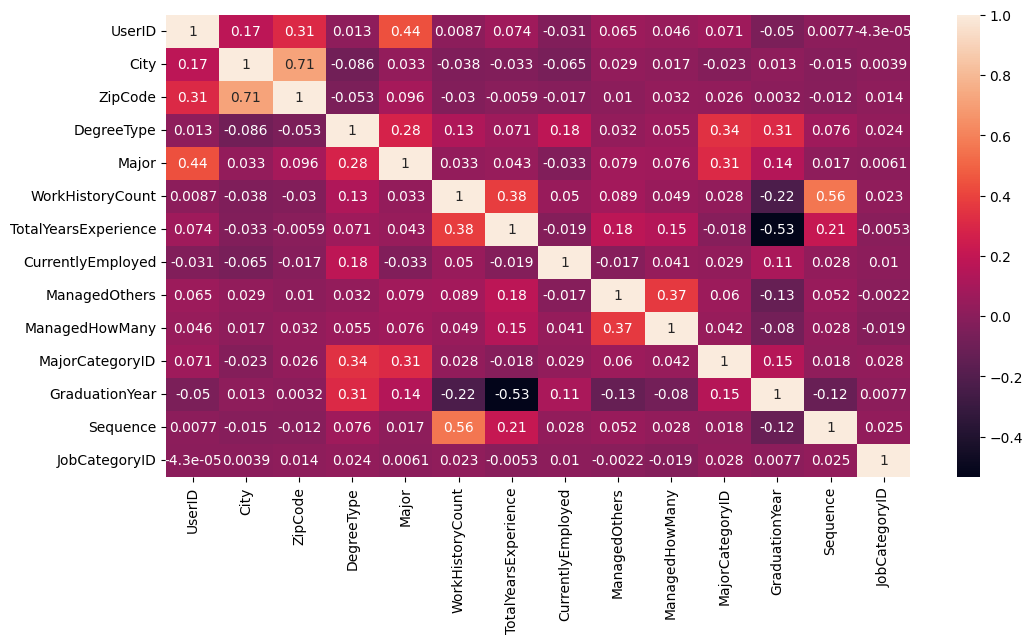

In [79]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = merged_data_users_and_history.select_dtypes(include='number').dropna(axis=0)

# Plot the correlation matrix with clusters
plt.figure(figsize=(12,6))
sns.heatmap(numeric_columns.corr(),annot=True)
plt.show()

Ce qui est assez étrange c'est que rien ne semble être corrélé avec les JobCategoryID de l'historique.

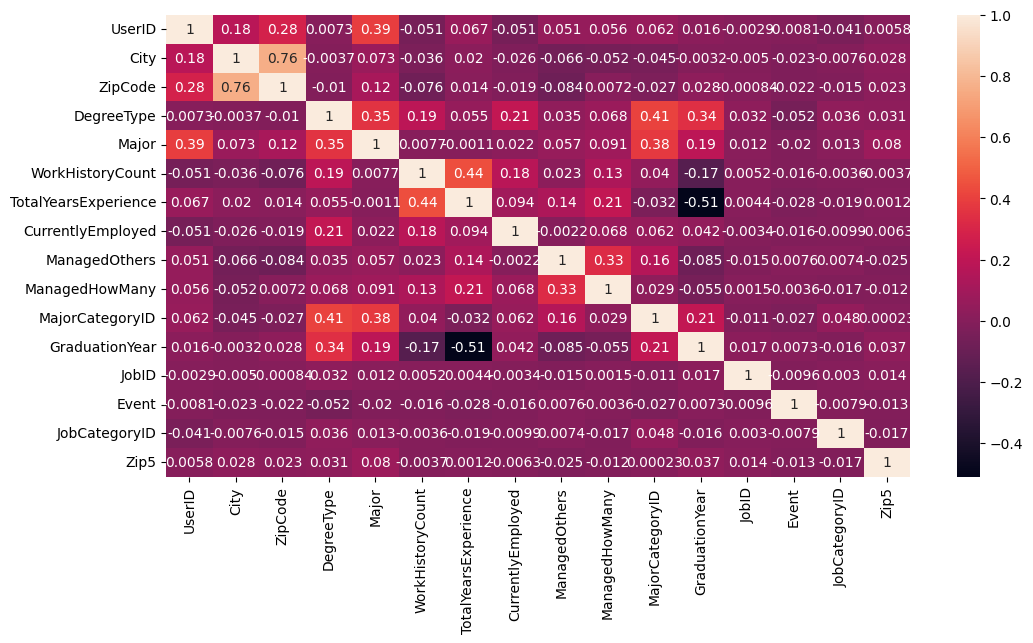

In [80]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = merged_data_gen.select_dtypes(include='number').dropna(axis=0)

# Plot the correlation matrix with clusters
plt.figure(figsize=(12,6))
sns.heatmap(numeric_columns.corr(),annot=True)
plt.show()

Quelques observations:
 - Le ZipCode et la ville sont corrélés à plus de 75% (la valeur la plus élevé), ensuite on observe que totalYearsExperience et GraduationYear son corrélé à plus de 50%, TotalYearsExpeerience et WorkHistoryCount à 44%, et DegreeType et MajorCategoryID à plus de 40% suivi par Major et UserID à 39%, ensuite sauf quelques exceptions les corrélations sont à moins dee 1%.
 - Il semblerai que les variables JobIDD, JobCategoryID, Zip5 ne sont pas corrélé avec le reste des données. Je m'attendais à ce qu'au moins JobCategoryID et MajorCategoryID soient en relation.

***

## <center> TEST_USERS DATASET

### `Information Totale`

Lisons le jeu de données dans le DataFrame *test_users* et jetons un coup d'œil à sa *forme, ses colonnes, les types de données des colonnes et les cinq premières lignes des données*.

Cela nous donnera un aperçu succinct des données en notre possession.

In [81]:
# Lecture du fichier csv
print(f"Forme des données: {df_test_users.shape}\n")

display(df_test_users.head(5))
display(df_test_users.info())

Forme des données: (277, 14)



UserID             City State Country  ZipCode  DegreeType          Major  \
0   12924          Chicago    IL      US    60628  Bachelor's            NaN   
1   18947          Chicago    IL      US    60647         NaN            NaN   
2   20976  Rolling Meadows    IL      US    60008    Master's            NaN   
3   21412          Chicago    IL      US    60649         NaN  Basic Studies   
4   40564             Zion    IL      US    60099         NaN            NaN   

        GraduationDate  WorkHistoryCount  TotalYearsExperience  \
0  2005-05-01 00:00:00                 4                   9.0   
1                  NaN                 6                  22.0   
2                  NaN                 5                   6.0   
3  2007-01-01 00:00:00                 5                   5.0   
4                  NaN                 6                   5.0   

  CurrentlyEmployed ManagedOthers  ManagedHowMany  MajorCategoryID  
0               Yes            No               0              NaN  
1               Yes            No               0              NaN  
2                No           Yes               6              NaN  
3               Yes            No               0              NaN  
4               NaN            No               0              NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                277 non-null    int64  
 1   City                  277 non-null    object 
 2   State                 277 non-null    object 
 3   Country               277 non-null    object 
 4   ZipCode               277 non-null    int64  
 5   DegreeType            189 non-null    object 
 6   Major                 190 non-null    object 
 7   GraduationDate        190 non-null    object 
 8   WorkHistoryCount      277 non-null    int64  
 9   TotalYearsExperience  264 non-null    float64
 10  CurrentlyEmployed     231 non-null    object 
 11  ManagedOthers         277 non-null    object 
 12  ManagedHowMany        277 non-null    int64  
 13  MajorCategoryID       118 non-null    float64
dtypes: float64(2), int64(4), object(8)
memory usage: 30.4+ KB


None

### **Exploration du contenu des variables**

Le jeu de données est dédié aux données de test des utilisateurs et contient 277 lignes et 14 colonnes.

Les caractéristiques sont les mêmes que celles des users.

In [82]:
"""
Define Unique categories in each column
"""
unique_list = []

for col in df_test_users.columns:
    # creating tuple: column name, number of unique values, type
    item = (col, df_test_users[col].nunique(), df_test_users[col].dtypes, df_test_users[col].unique())
    unique_list.append(item)
    
unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column_Name", "Num_Unique", "Type", "Unique_category"]
).sort_values(by="Num_Unique")


display(unique_counts)

Column_Name  Num_Unique     Type  \
2                  State           1   object   
3                Country           1   object   
10     CurrentlyEmployed           2   object   
11         ManagedOthers           2   object   
5             DegreeType           6   object   
8       WorkHistoryCount          12    int64   
12        ManagedHowMany          22    int64   
13       MajorCategoryID          29  float64   
9   TotalYearsExperience          34  float64   
7         GraduationDate          96   object   
1                   City          97   object   
6                  Major         120   object   
4                ZipCode         146    int64   
0                 UserID         277    int64   

                                      Unique_category  
2                                                [IL]  
3                                                [US]  
10                                     [Yes, No, nan]  
11                                          [No, Yes]  
5   [Bachelor's, nan, Master's, High School, Vocat...  
8              [4, 6, 5, 0, 3, 8, 1, 7, 2, 9, 10, 11]  
12  [0, 6, 10, 3, 15, 30, 7, 2, 100, 5, 25, 4, 11,...  
13  [nan, 0.0, 114.0, 110.0, 111.0, 44.0, 80.0, 17...  
9   [9.0, 22.0, 6.0, 5.0, nan, 14.0, 3.0, 4.0, 18....  
7   [2005-05-01 00:00:00, nan, 2007-01-01 00:00:00...  
1   [Chicago, Rolling Meadows, Zion, Buffalo Grove...  
6   [nan, Basic Studies, Not Applicable, Economics...  
4   [60628, 60647, 60008, 60649, 60099, 60651, 606...  
0   [12924, 18947, 20976, 21412, 40564, 42836, 449...

In [83]:
"""
Voyons si les Users de test sont dans les données feedbacks
"""

# Identifier les UserID de test qui ne sont pas présents dans les données de feedback
missing_test_users = df_test_users[~df_test_users['UserID'].isin(df_feedbacks['UserID'])]

# Afficher les UserID de test manquants
print("UserID de test manquants dans les données de feedback :")
display(missing_test_users)

UserID de test manquants dans les données de feedback :


UserID             City State Country  ZipCode  DegreeType  \
0      12924          Chicago    IL      US    60628  Bachelor's   
1      18947          Chicago    IL      US    60647         NaN   
2      20976  Rolling Meadows    IL      US    60008    Master's   
3      21412          Chicago    IL      US    60649         NaN   
4      40564             Zion    IL      US    60099         NaN   
..       ...              ...   ...     ...      ...         ...   
272  1454754      Des Plaines    IL      US    60016  Bachelor's   
273  1458384          Chicago    IL      US    60630         NaN   
274  1458917           Aurora    IL      US    60502  Bachelor's   
275  1466313         Glenview    IL      US    60026    Master's   
276  1471500       Crest Hill    IL      US    60403         NaN   

                             Major       GraduationDate  WorkHistoryCount  \
0                              NaN  2005-05-01 00:00:00                 4   
1                              NaN                  NaN                 6   
2                              NaN                  NaN                 5   
3                    Basic Studies  2007-01-01 00:00:00                 5   
4                              NaN                  NaN                 6   
..                             ...                  ...               ...   
272          Accounting & Auditing                  NaN                 7   
273                            NaN                  NaN                10   
274  Telecommunications Management  2001-10-01 00:00:00                 6   
275           Marketing/Management                  NaN                 8   
276                            NaN                  NaN                 7   

     TotalYearsExperience CurrentlyEmployed ManagedOthers  ManagedHowMany  \
0                     9.0               Yes            No               0   
1                    22.0               Yes            No               0   
2                     6.0                No           Yes               6   
3                     5.0               Yes            No               0   
4                     5.0               NaN            No               0   
..                    ...               ...           ...             ...   
272                  27.0                No            No               0   
273                  23.0               NaN            No               0   
274                   6.0               NaN            No               0   
275                  22.0               Yes            No               0   
276                   9.0                No            No               0   

     MajorCategoryID  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
272              NaN  
273              NaN  
274              NaN  
275              NaN  
276              NaN  

[277 rows x 14 columns]

Aucun utilisateur de test n'est présent dans le dataset feedbacks.

### `Variables Manquantes`

UserID                  0.000000
City                    0.000000
State                   0.000000
Country                 0.000000
ZipCode                 0.000000
WorkHistoryCount        0.000000
ManagedOthers           0.000000
ManagedHowMany          0.000000
TotalYearsExperience    0.046931
CurrentlyEmployed       0.166065
Major                   0.314079
GraduationDate          0.314079
DegreeType              0.317690
MajorCategoryID         0.574007
dtype: float64


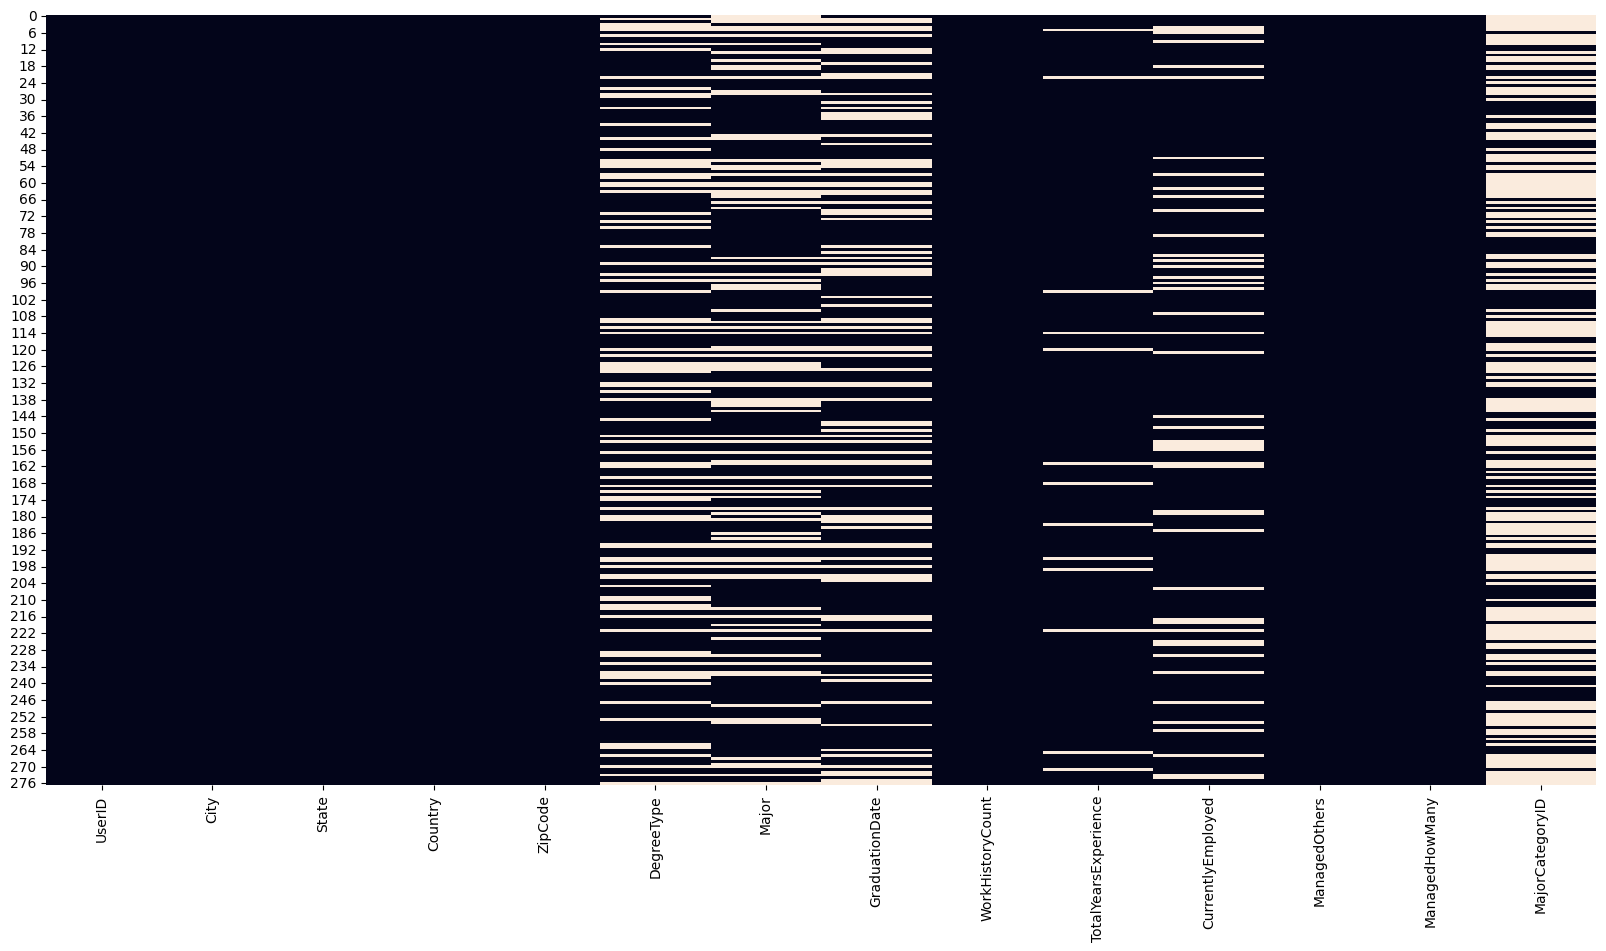

In [84]:
"""
Distribution des valeurs manquantes selon les données
"""

# Nombre de valeurs NaN dans chaque colonne
number_na = df_test_users.isna().sum()

# On écrit le pourcentage de valeurs manquantes dans que l'on trie dans l'ordre croissant
percent_na = (number_na/df_test_users.shape[0]).sort_values(ascending=True)
print(percent_na)

# Affichons les valeurs manquantes dans une heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_test_users.isna(), cbar=False)
plt.show()

***

## <center> RESUME CHECKLIST

### `ANALYSE DE FORME`

### DataSet users.csv
- Lignes et colonnes: 2337 lignes et 14 colonnes
- Types de Variables: Qualitative (11), Quantitative (3)
- Analyse des variables manquantes:
    * Beaucoup de valeurs manquantes dans les catégories sur les diplômes (à part la date de graduation) il manque 13% des données dans chacunes des colonnes qui ne correspondent pas forcément.
    * 12% de NaN pour la colonne des personnes déjà employé ou non et très peu de valeurs   manquantes sur les années d'expérience (- de 1.5%)
    
### DataSet users_history.csv
- Rows et colonnes: 11012 lignes et 4 colonnes
- Types de Variables: Qualitative (3), Quantitative (1)
- Analyse des variables manquantes: Aucune variables manquantes

### DataSet jobs.csv
- Lignes et colonnes: 4291 lignes et 11 colonnes
- Types de Variables: Qualitative (9), Quantitative (2)
- Analyse des variables manquantes: 
    * Les principales variables manquantes sont le code postal (+70%)
    * Quelque Nan à propos des prérequis (+15%)
    
### DataSet test_users.csv
- Lignes et colonnes: 277 lignes et 14 colonnes
- Types de Variables: pareil que user.csv
- Analyse des variables manquantes: plus ou moins pareil que user.csv

### DataSet feedbacks.csv
- Lignes et colonnes: 28928 lignes et 3 colonnes
- Types de Variables: Qualitative (3), Quantitative (0)
- Analyse des variables manquantes: pas de variables manquantes

### `ANALYSE DE FOND`

- Visualisation de la variable event:
    * 64% de vues
    * 32% de postulés
    * 3% d'embauchés
    * Les embauchés ont forcément postulé et les postulés ont nécessairement vues l'emploi
- Signification des variables:
    * Variables qualitative: presque uniquement des variables qualitatives
    * Pas de variables continues à part les dates.
    * Les titres, descriptions, prérequis, major doivent être traité différemment du reste des variables (avec des techniques de NLP).
   

### `Initial Conclusion`:

- Beaucoup de données manquantes (au mieux on garde 50% du dataset).
- Trois groupes de données interessants: géographique, professionnel, académique.
- Il semble que les variables que nous avons examinées jusqu'à présent ne soient pas très discriminantes pour déterminer les événements "view", "applied" et "hired". Par conséquent, il serait inapproprié de conclure que l'état de l'événement peut être déterminé uniquement à partir des variables de diplôme par exemple.


### `Analyse détaillée`

- Relationship Variables/Variables: Le ZipCode et la ville sont corrélés à plus de 75% (la valeur la plus élevé), ensuite on observe que totalYearsExperience et GraduationYear son corrélé à plus de 50%, TotalYearsExpeerience et WorkHistoryCount à 44%, et DegreeType et MajorCategoryID à plus de 40% suivi par Major et UserID à 39%, ensuite sauf quelques exceptions les corrélations sont à moins dee 1%.

### `Hypothèse nulle`

H0 = En moyenne, les diplômes, l'expérience professionnelle et la localisation des utilisateurs embauchés,  appliqué mais non embauchés et vue mais non appliqués sont identiques.

- Les tests de variance et anova montrent que nous ne pouvons rien dire sur les caractéristiques des utilisateurs pour des types de jobs spécifiques par manque de données de test et car les caractéristiques qui ne sont pas utiles pour certain jobs, peuvent l'être pour d'autre. Ainsi nous ne pouvons pas rejeter l'hypothèse H0.